In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import corner
from scipy import stats
from copy import deepcopy

In [2]:
plt.rcParams['axes.labelsize'] = 14  # Set size for x and y axis labels
# plt.rcParams['xtick.labelsize'] = 14  # Set size for x-tick labels
# plt.rcParams['ytick.labelsize'] = 14  # Set size for y-tick labels
plt.rcParams['axes.titlesize'] = 16  # Set size for title
plt.rcParams['axes.titleweight'] = 'bold'  # Make title bold
# plt.rc('font', family='Times New Roman')

In [3]:
psrlist = ['J0023+0923',]

In [4]:
psr = None
chain_folder = "/lorule/scratch/jdt00012/chains_7Nov_24"

params = [r'$\log{\mathcal{T}}$ [s]', r'$\nu$ [1/s]', r'$\phi_+$ [rad]', r'$\phi_-$ [rad]']
# params = ['log_A', 'nu', 'phi_minus', 'phi_plus']
# params = ['log_b', 'log_mproj', 'vinf', 'omg', 't0', 'RN_gamma', 'RN_log10_A']

In [5]:
psr

PSR J0023+0923
Chain shape = (99900, 10)


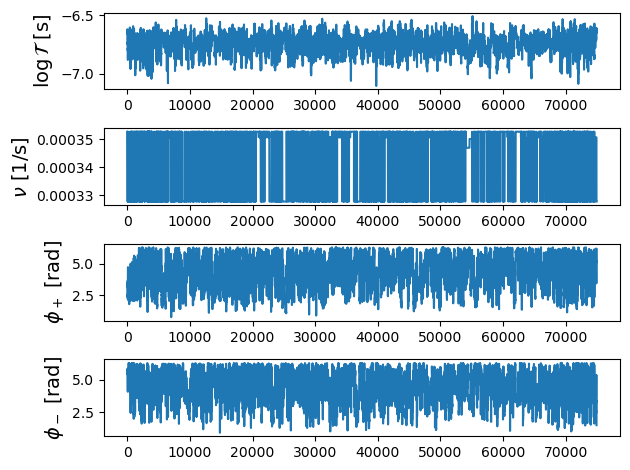

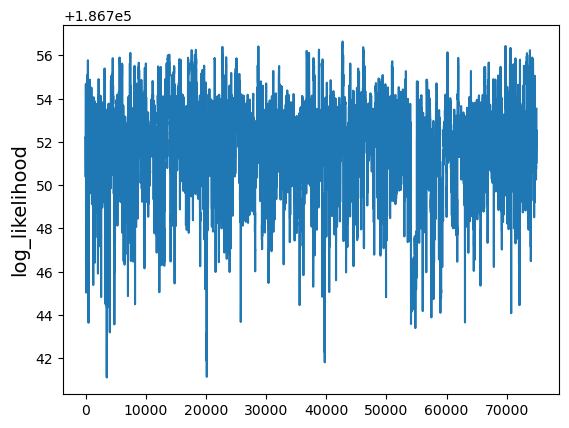

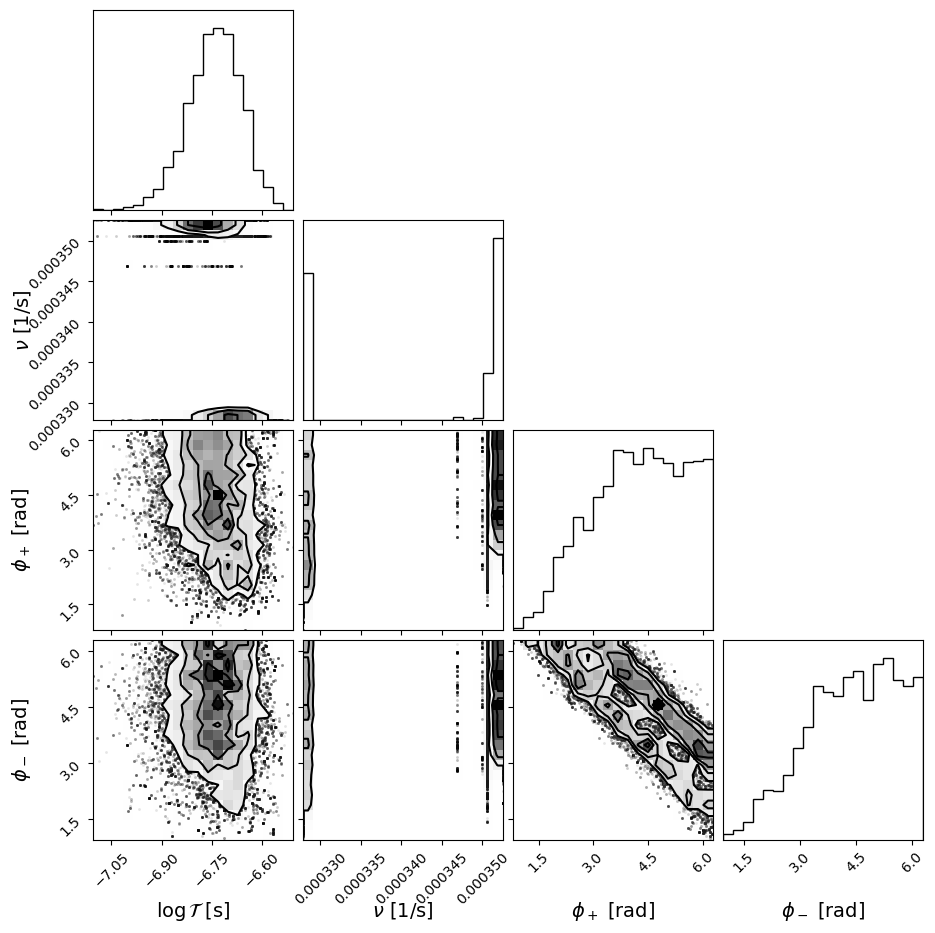

In [6]:
psr = None
if psr is None:
    for psr in psrlist:
        
        chain_file = f"{chain_folder}/{psr}/chain_1.txt"
        chain = np.genfromtxt(chain_file)
        print(f"PSR {psr}")
        print(f"Chain shape = {chain.shape}")
       
        ndim = len(params)
        burn = chain.shape[0]//4
        fig, axs = plt.subplots(ndim, 1)
        for i, param in enumerate(params):
            ax = axs[i]
            i+= 2
            ax.plot(chain[burn:, i], ls='-', marker=None, alpha=1.0)
            ax.set_ylabel(param)
        fig.tight_layout()
        plt.show()

        plt.plot(chain[burn:, -3])
        plt.ylabel('log_likelihood')
        plt.show()

        corner.corner(chain[burn:,2:-4], labels=params,  plot_contours=True)
        plt.show()

In [7]:
chain[burn:, 9]

array([1., 1., 1., ..., 1., 1., 1.])

PSR J0023+0923
Chain shape = (99900, 10)


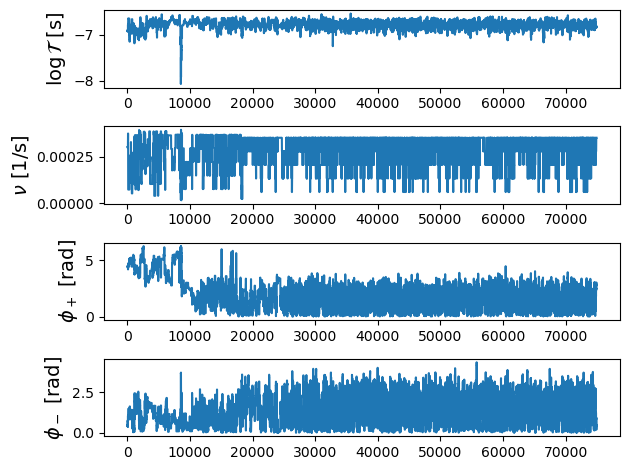

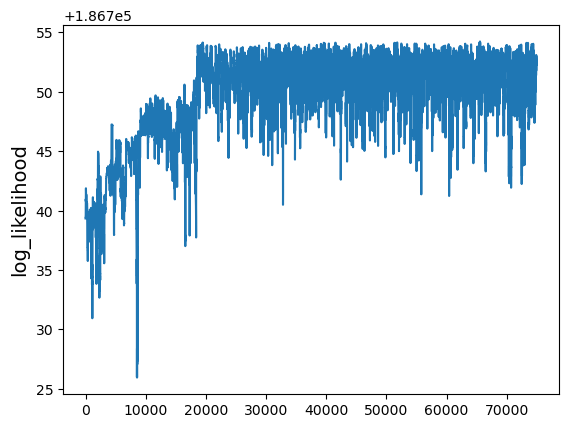

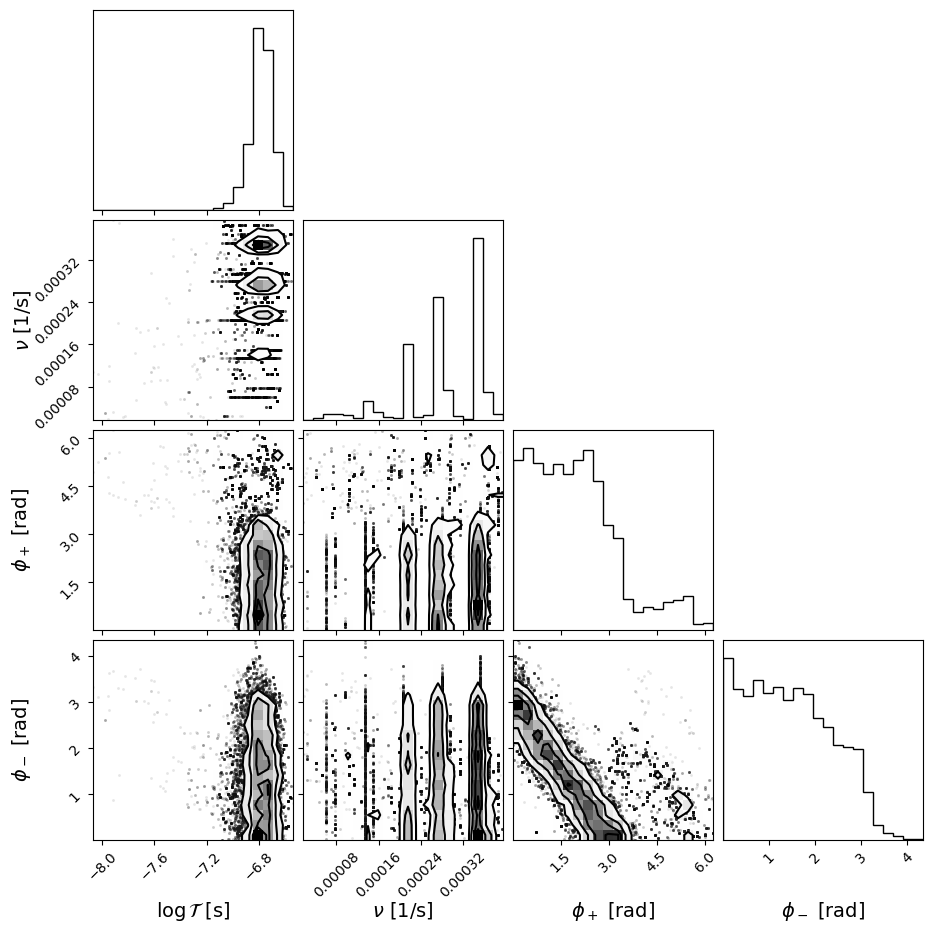

In [8]:
psrlist = ['J0023+0923',]
psr = None
chain_folder = "/lorule/scratch/jdt00012/chains_12Nov_2024"
if psr is None:
    for psr in psrlist:
        chain_file = f"{chain_folder}/{psr}/chain_1.txt"
        chain = np.genfromtxt(chain_file)
        print(f"PSR {psr}")
        print(f"Chain shape = {chain.shape}")
       
        ndim = len(params)
        burn = chain.shape[0]//4
        fig, axs = plt.subplots(ndim, 1)
        for i, param in enumerate(params):
            ax = axs[i]
            i+= 2
            ax.plot(chain[burn:, i], ls='-', marker=None, alpha=1.0)
            ax.set_ylabel(param)
        fig.tight_layout()
        plt.show()

        plt.plot(chain[burn:, -3])
        plt.ylabel('log_likelihood')
        plt.show()

        corner.corner(chain[burn:,2:-4], labels=params,  plot_contours=True)
        plt.show()

In [9]:
best_values_median = np.median(chain, axis=0)
print("Best values (median):", best_values_median)

Best values (median): [ 3.10571501e+00 -1.83248321e+01 -6.78237225e+00  2.79612836e-04
  2.36207396e+00  1.14022724e+00  1.86747926e+05  1.86749288e+05
  3.81300000e-02  1.00000000e+00]


In [10]:
best_values_map = []
for i in range(chain.shape[1]):
    hist, bin_edges = np.histogram(chain[:, i], bins=50, density=True)
    max_bin = np.argmax(hist)
    best_values_map.append(0.5 * (bin_edges[max_bin] + bin_edges[max_bin + 1]))

print("Best values (MAP):", best_values_map)

Best values (MAP): [3.1499760344938643, -19.23548772799338, -6.7765099063016, 0.0003563770072213599, 4.9515976412360505, 1.1725836775792258, 186687.51476155999, 186688.87649956, 0.03292883, 1.01]


In [11]:
B_med = np.median(chain[:,2])
print(B_med)

chain_ij = np.where(chain == B_med)
chain_i = chain_ij[0][0]
chain_j = chain_ij[1][0]
chain[chain_i, chain_j]


-6.7823722481364


-6.7823722481364

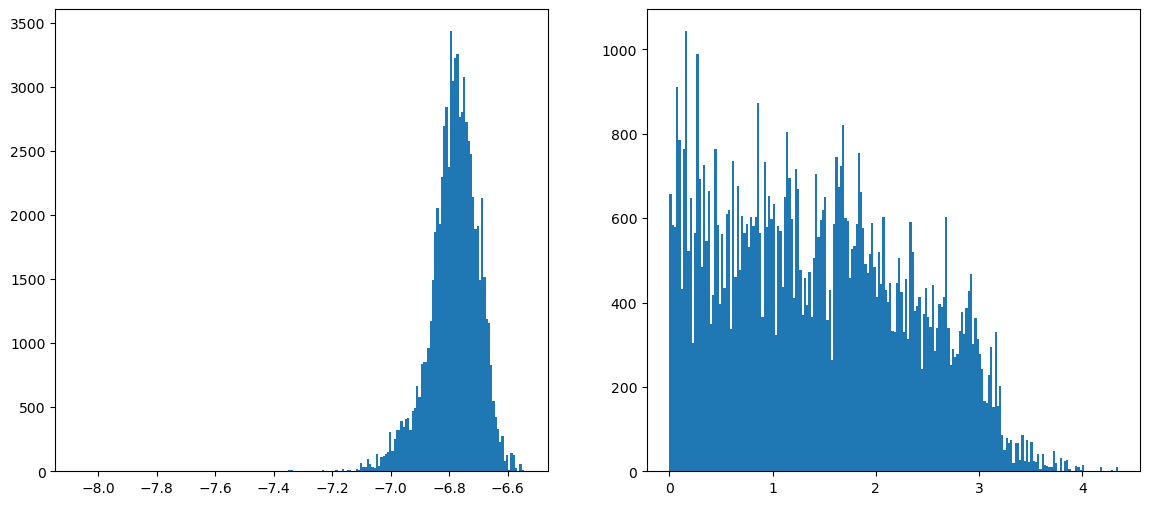

In [12]:
log_B_chain = chain[burn:, 2]
phi_plus_chain = chain[burn:, 5]
nbins = 200

fig, axs = plt.subplots(1,2, figsize = (14, 6))
axs[0].hist(log_B_chain, bins = nbins)
axs[1].hist(phi_plus_chain, bins = nbins)
plt.show()

0.733743807939398


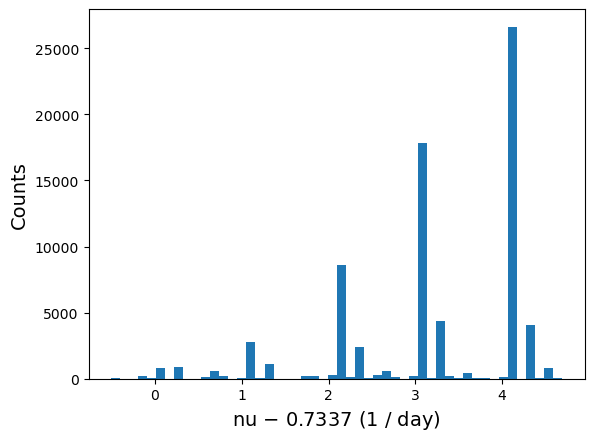

In [13]:
nu_day = 2*np.pi / 86164.0905
# nu_day = 2*np.pi / 86400
# nu_day = 1
nu_chain = chain[burn:, 3] / nu_day
mask = nu_chain < 1
mode_result = stats.mode(nu_chain[mask])
nu_mode = mode_result.mode
print(f"{nu_mode}")
nbins = 50
fig, ax = plt.subplots()
ax.hist(nu_chain - nu_mode, bins = nbins)
ax.set_xlabel(f"nu $-$ {round(nu_mode, 4)} (1 / day)")
ax.set_ylabel(f"Counts")
plt.show()

0.0002 0.00022
log_B_avg_0 = -6.796140065229683
nu_mode=0.0002066909356550525


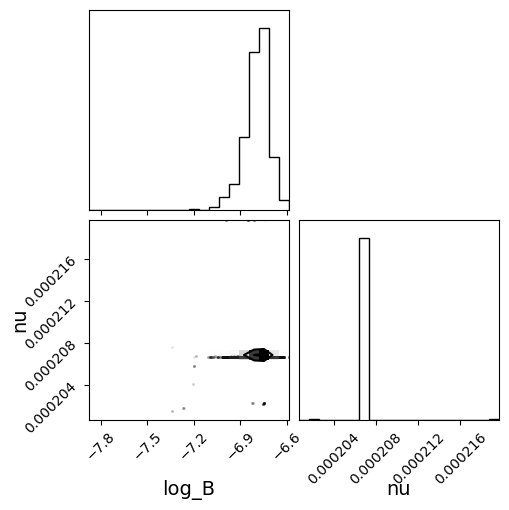

0.00025 0.0003
log_B_avg_1 = -6.781310979571247
nu_mode=0.00029257828898462837


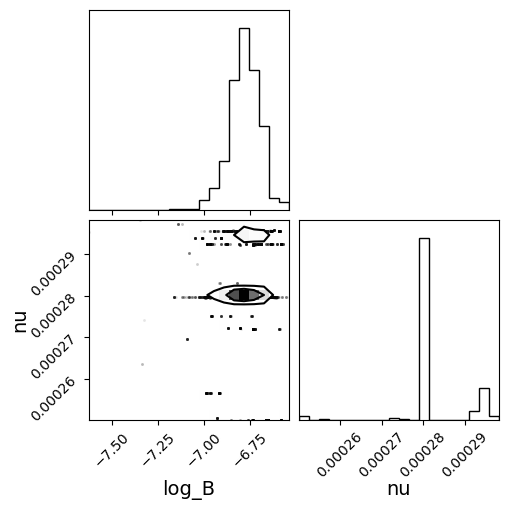

0.00033 0.0004
log_B_avg_2 = -6.781912575647384
nu_mode=0.0003688145660531418


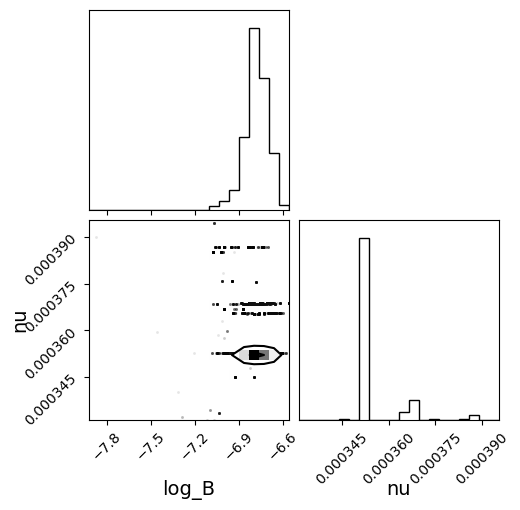

In [14]:
nu_modes = []
i = -1
for nu_min, nu_max in [(0.00020, 0.00022), (0.00025, 0.00030), (0.00033, 0.00040)]:
    i+=1
    nu_chain = chain[burn:, 3]
    log_B_chain = chain[burn:, 2]
    mask = np.logical_and(nu_chain > nu_min, nu_chain < nu_max)
    log_B_chain = log_B_chain[mask]
    nu_chain = nu_chain[mask]
    corner.corner(chain[burn:,2:4][mask], labels=["log_B", "nu"],  plot_contours=True)
    print(nu_min, nu_max)
    print(f"log_B_avg_{i} = {np.average(log_B_chain)}")
    
    mode_result = stats.mode(nu_chain)
    nu_mode = mode_result.mode
    print(f"{nu_mode=}")
    nu_modes.append(nu_mode)
    
    plt.show()

In [15]:
nu_modes = np.array([0.000206, 0.00028, 0.000350])
print(f"{nu_modes=}")


nu_modes=array([0.000206, 0.00028 , 0.00035 ])


In [16]:
nu0 = nu_modes[0]
nu1 = nu_modes[1]
nu2 = nu_modes[2]

print(f"{nu2 - nu1=}")
print(f"{(nu1 - nu0)=}")
print(f"{nu_modes / (nu2 - nu1)=}")

nu2 - nu1=7.000000000000002e-05
(nu1 - nu0)=7.399999999999998e-05
nu_modes / (nu2 - nu1)=array([2.94285714, 4.        , 5.        ])


PSR J0023+0923
Chain shape = (99900, 10)


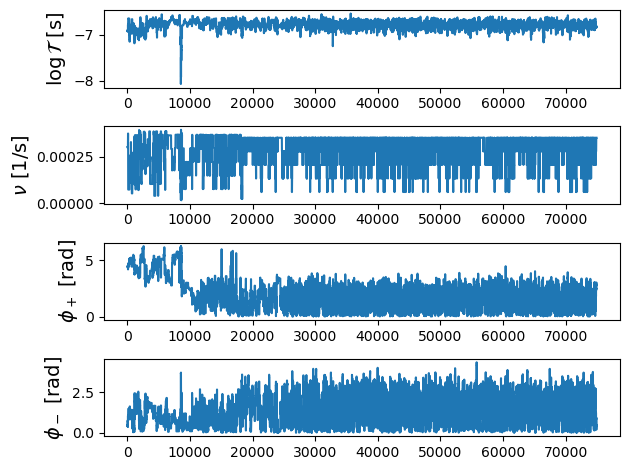

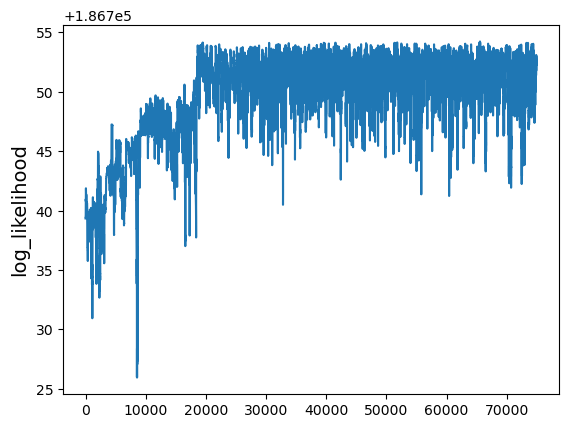

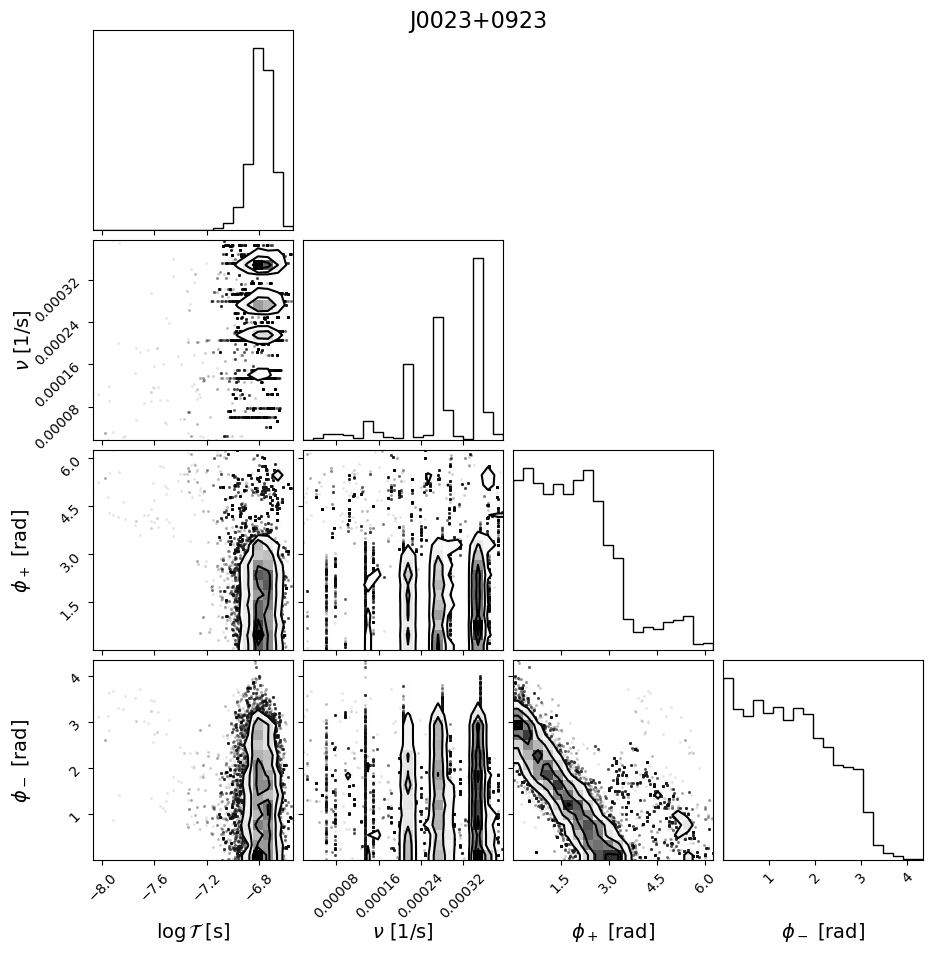

PSR J0610-2100
Chain shape = (99900, 10)


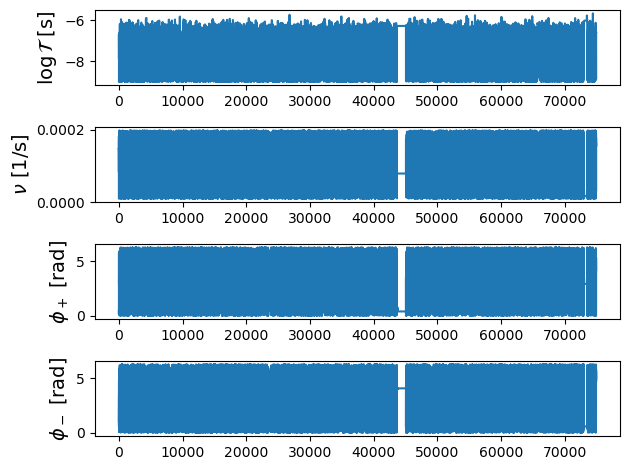

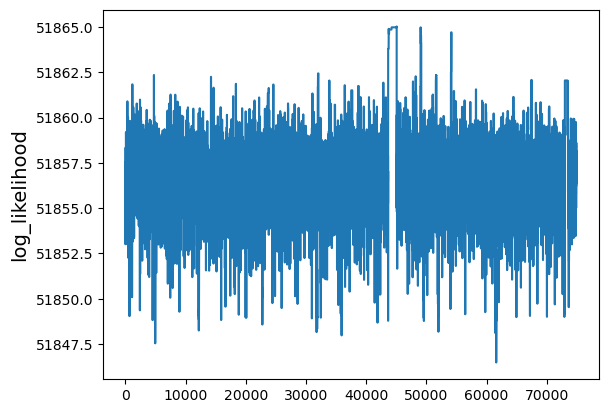

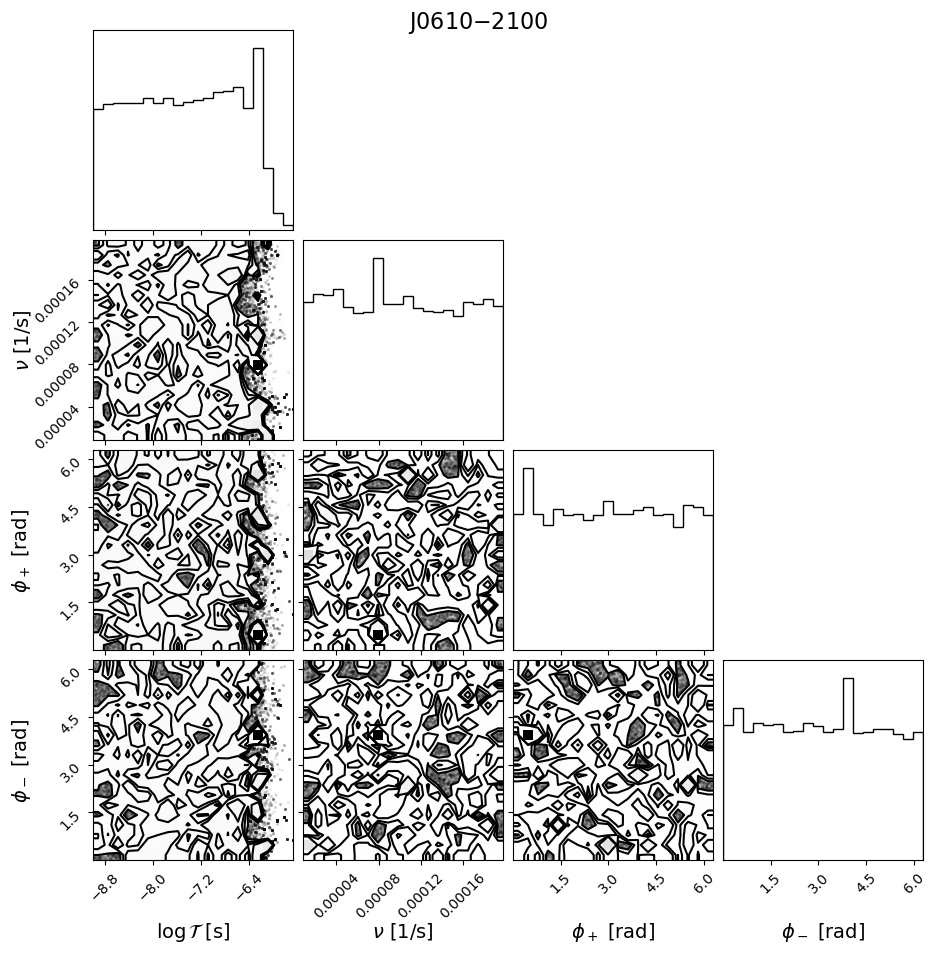

PSR J0636+5128
Chain shape = (99900, 10)


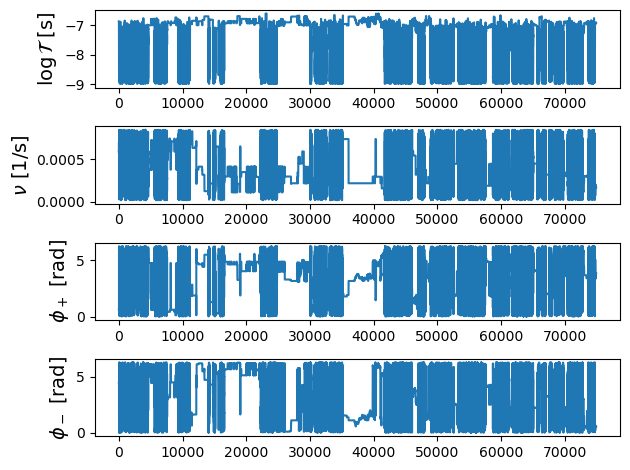

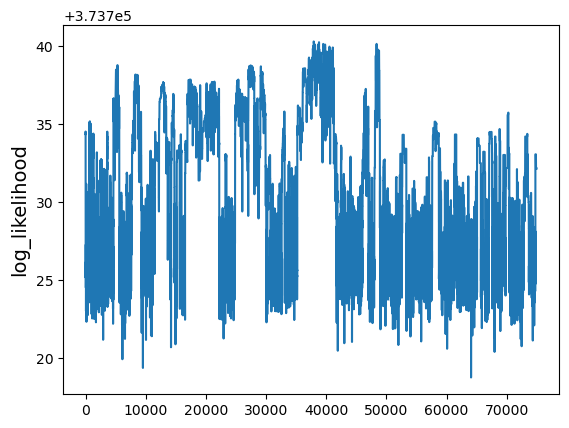

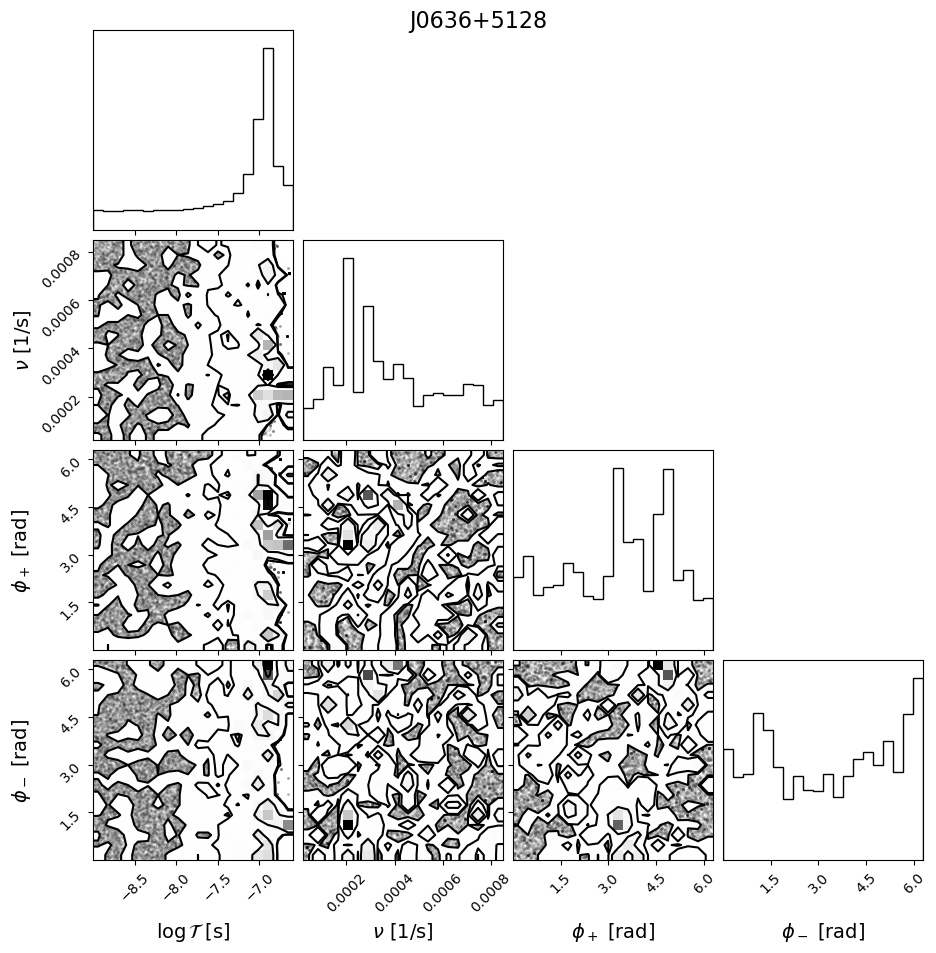

PSR J1719-1438
Chain shape = (99900, 10)


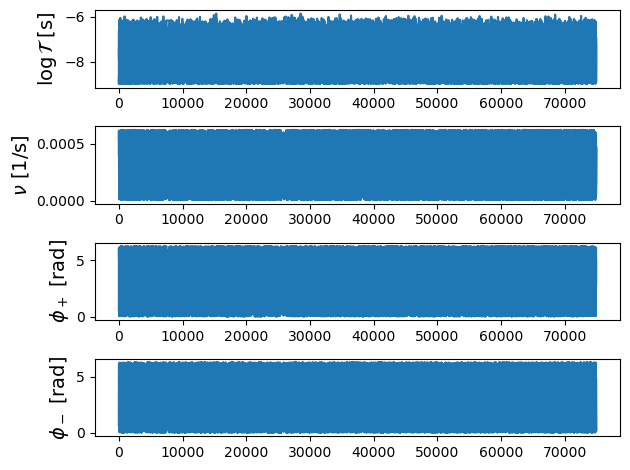

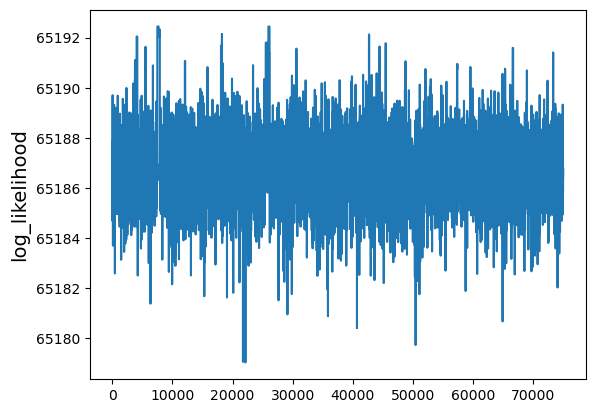

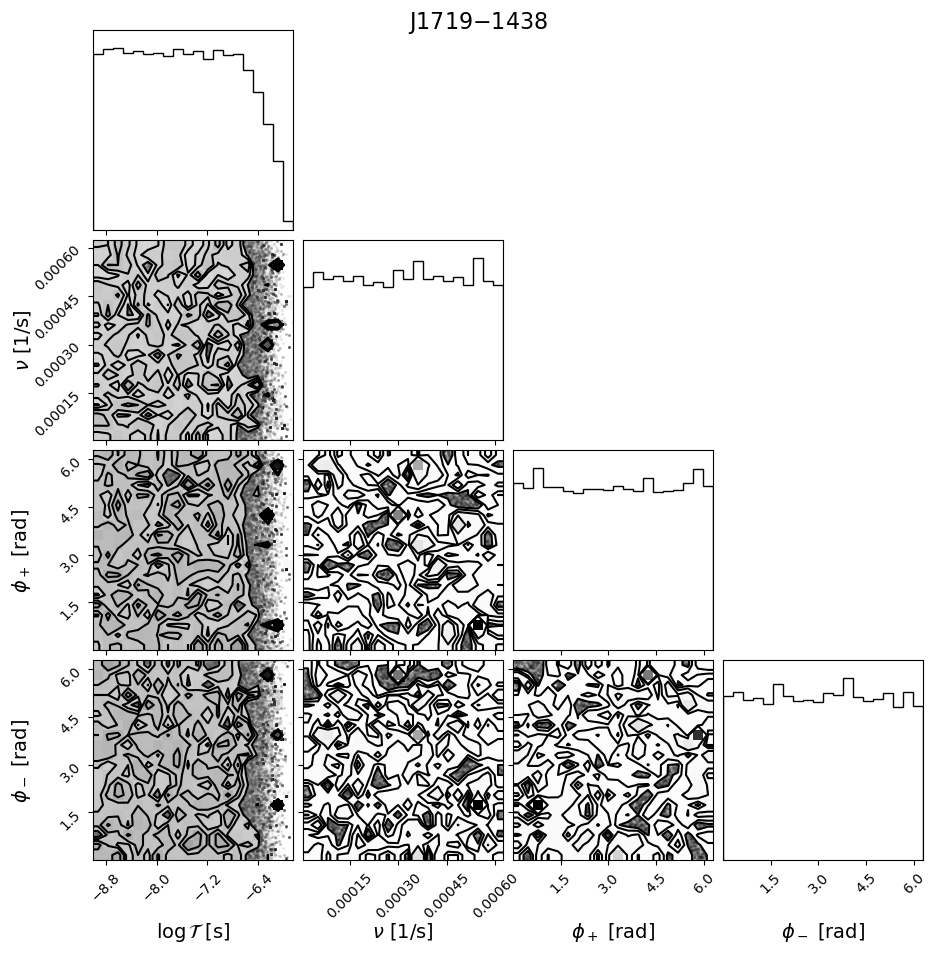

PSR J1745+1017
Chain shape = (99900, 10)


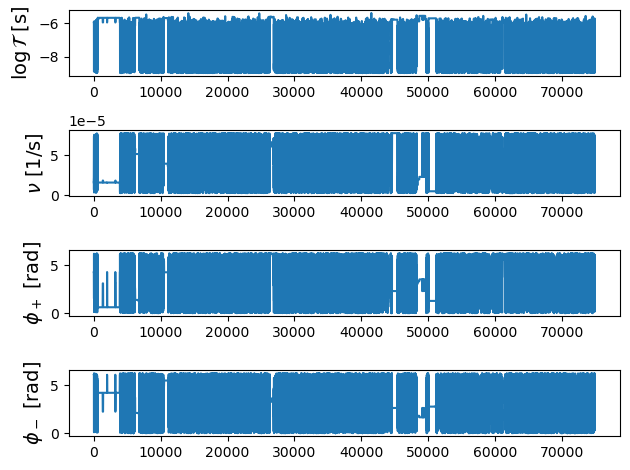

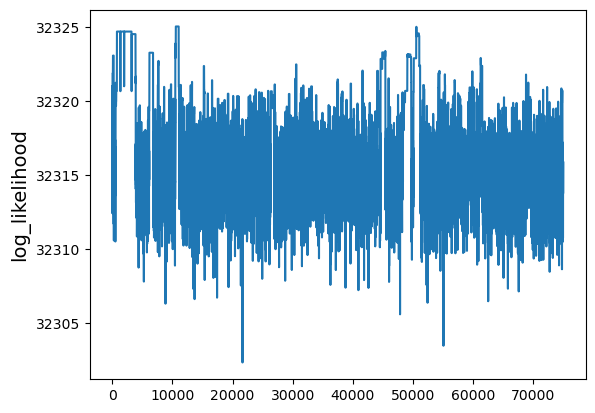

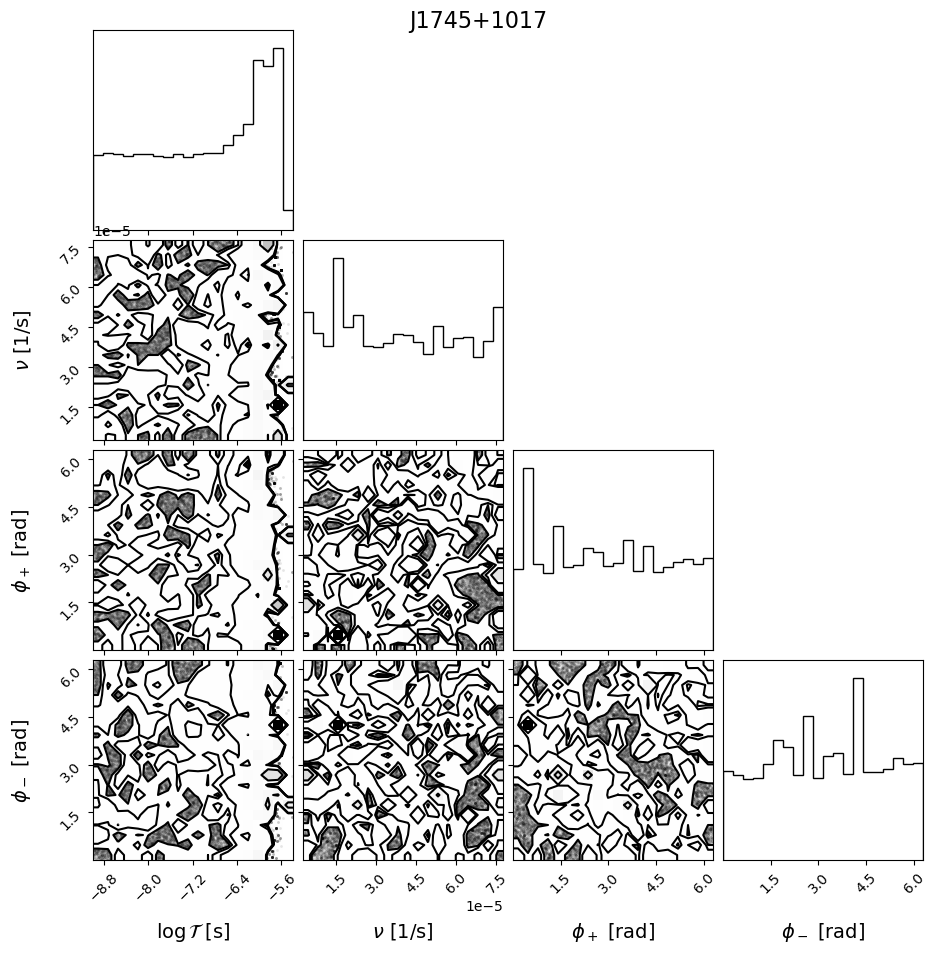

PSR J2214+3000
Chain shape = (99900, 10)


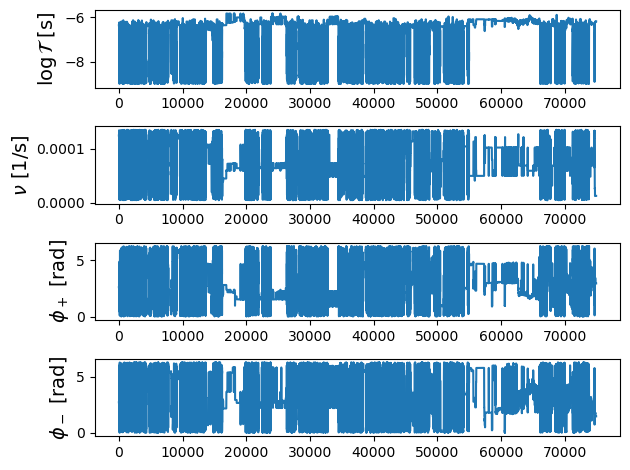

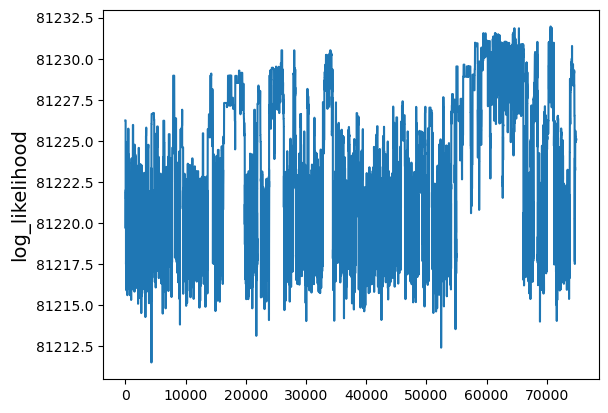

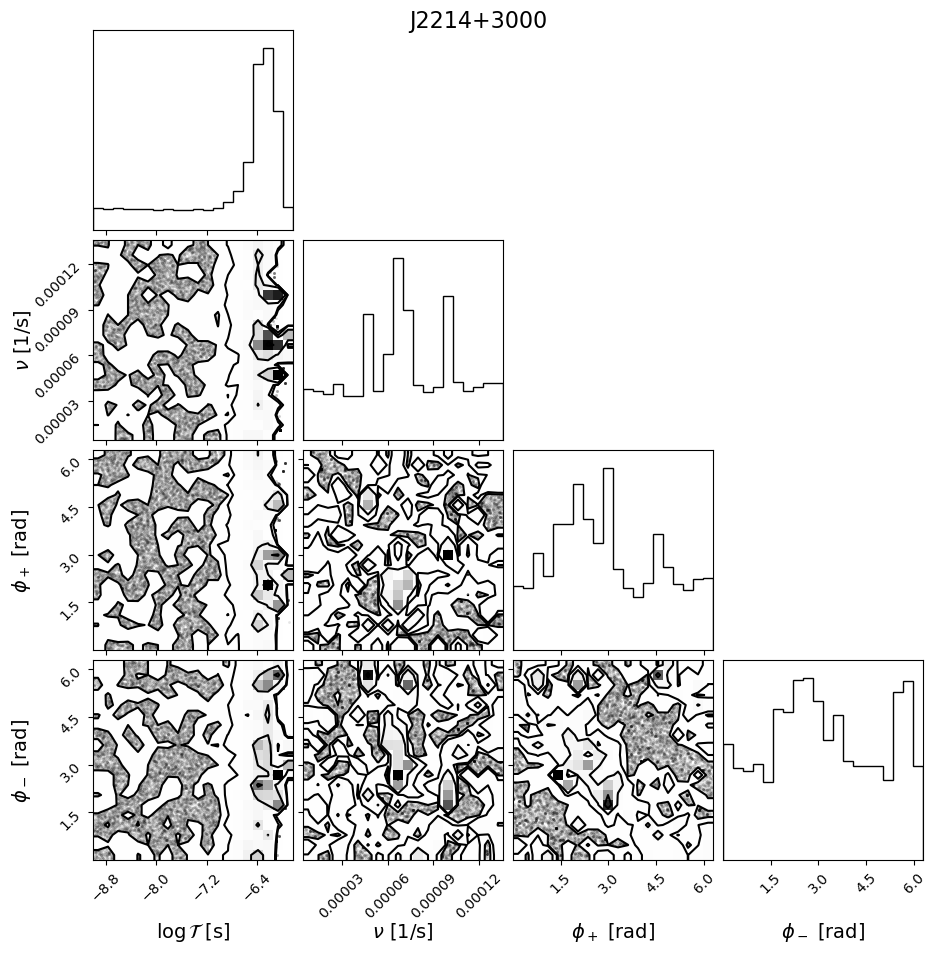

PSR J2234+0944
Chain shape = (99900, 10)


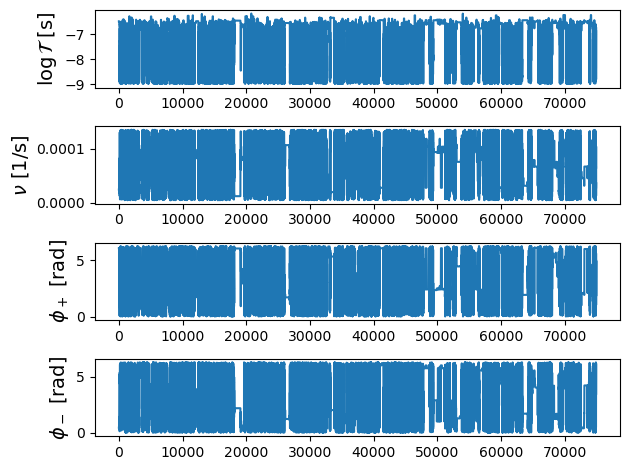

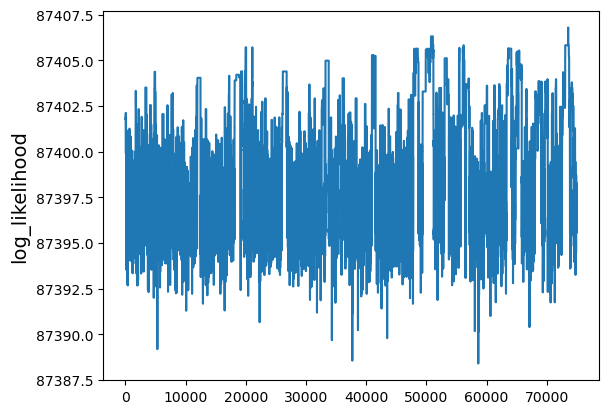

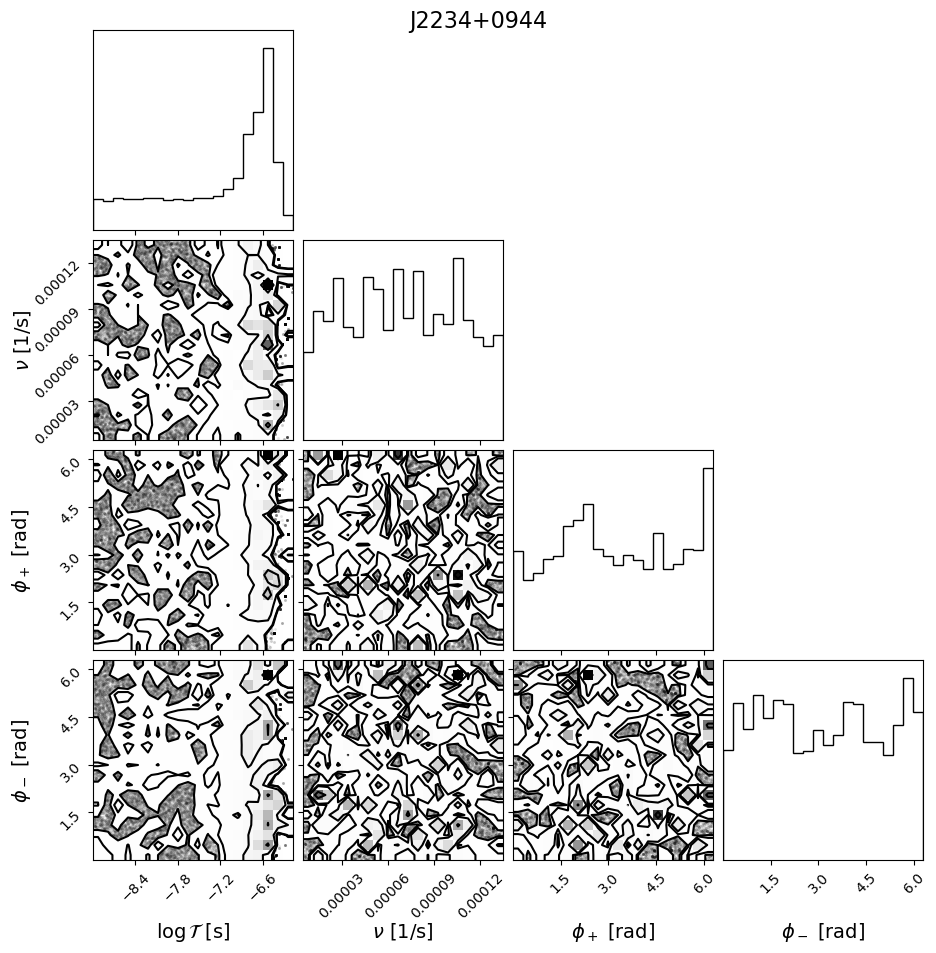

In [17]:
psrlist = ['J0023+0923','J0610-2100', 'J0636+5128', 'J1719-1438', 'J1745+1017','J2214+3000', 'J2234+0944']
psrlist_formatted = ['J0023+0923','J0610$-$2100', 'J0636+5128', 'J1719$-$1438', 'J1745+1017','J2214+3000', 'J2234+0944']
all_chains = {}
psr = None
chain_folder = "/lorule/scratch/jdt00012/chains_12Nov_2024"
if psr is None:
    for k, psr in enumerate(psrlist):
        chain_file = f"{chain_folder}/{psr}/chain_1.txt"
        chain = np.genfromtxt(chain_file)
        print(f"PSR {psr}")
        print(f"Chain shape = {chain.shape}")
       
        ndim = len(params)
        burn = chain.shape[0]//4
        fig, axs = plt.subplots(ndim, 1)
        for i, param in enumerate(params):
            ax = axs[i]
            i+= 2
            ax.plot(chain[burn:, i], ls='-', marker=None, alpha=1.0)
            ax.set_ylabel(param)
        fig.tight_layout()
        plt.show()

        plt.plot(chain[burn:, -3])
        plt.ylabel('log_likelihood')
        plt.show()

        fig = corner.corner(chain[burn:,2:-4], labels=params,  plot_contours=True)
        fig.suptitle(psrlist_formatted[k], fontsize = 16)
        plt.show()

PSR J0610-2100
Chain shape = (99900, 10)


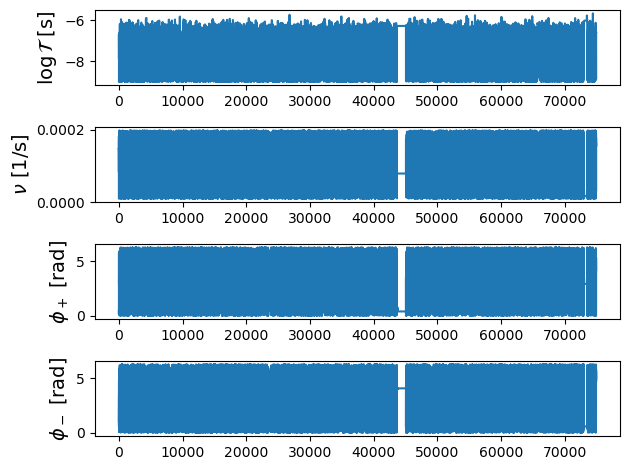

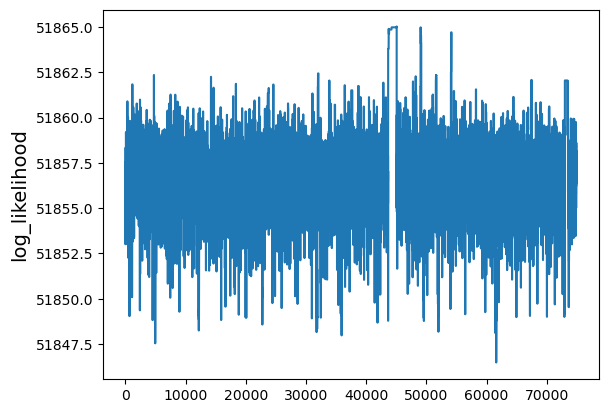

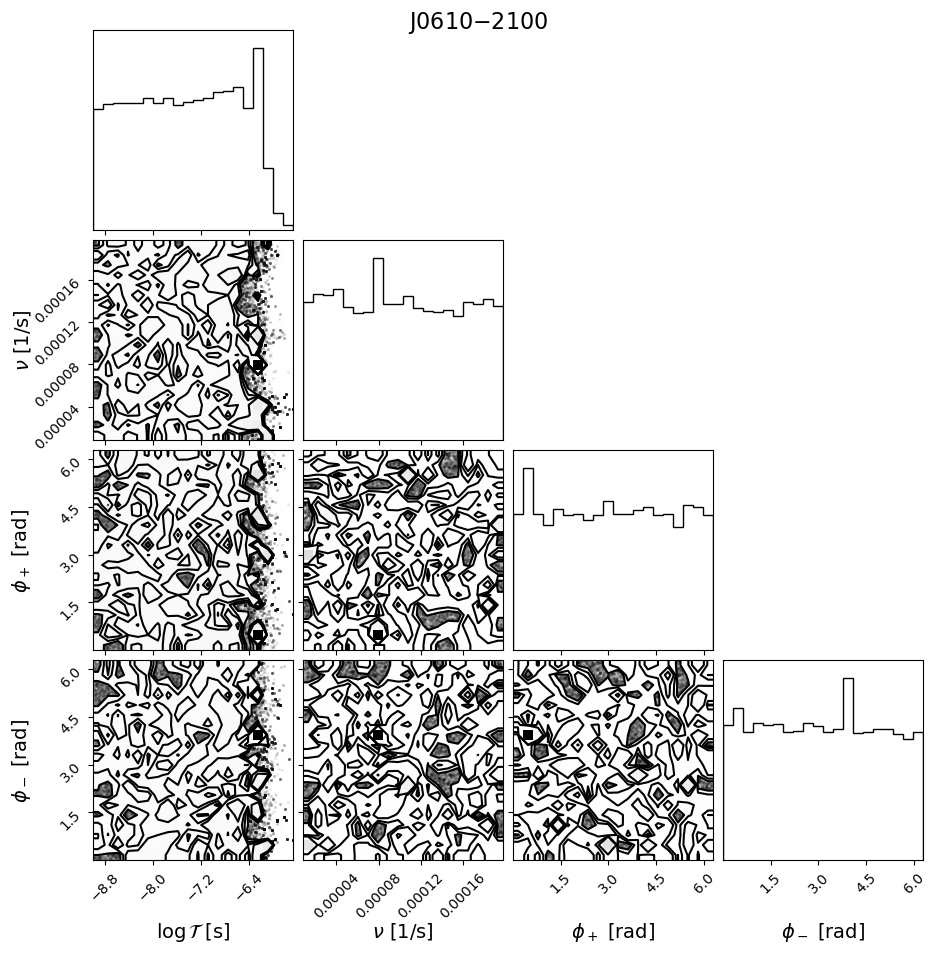

In [18]:
psrlist = ['J0610-2100']
psrlist_formatted = ['J0610$-$2100']
all_chains = {}
psr = None
chain_folder = "/lorule/scratch/jdt00012/chains_12Nov_2024"
if psr is None:
    for k, psr in enumerate(psrlist):
        chain_file = f"{chain_folder}/{psr}/chain_1.txt"
        chain = np.genfromtxt(chain_file)
        print(f"PSR {psr}")
        print(f"Chain shape = {chain.shape}")
       
        ndim = len(params)
        burn = chain.shape[0]//4
        fig, axs = plt.subplots(ndim, 1)
        for i, param in enumerate(params):
            ax = axs[i]
            i+= 2
            ax.plot(chain[burn:, i], ls='-', marker=None, alpha=1.0)
            ax.set_ylabel(param)
        fig.tight_layout()
        plt.show()

        plt.plot(chain[burn:, -3])
        plt.ylabel('log_likelihood')
        plt.show()

        fig = corner.corner(chain[burn:,2:-4], labels=params,  plot_contours=True)
        fig.suptitle(psrlist_formatted[k], fontsize = 16)
        plt.show()

log_T_max=-6.203771455158535
T_max=6.255017727004273e-07


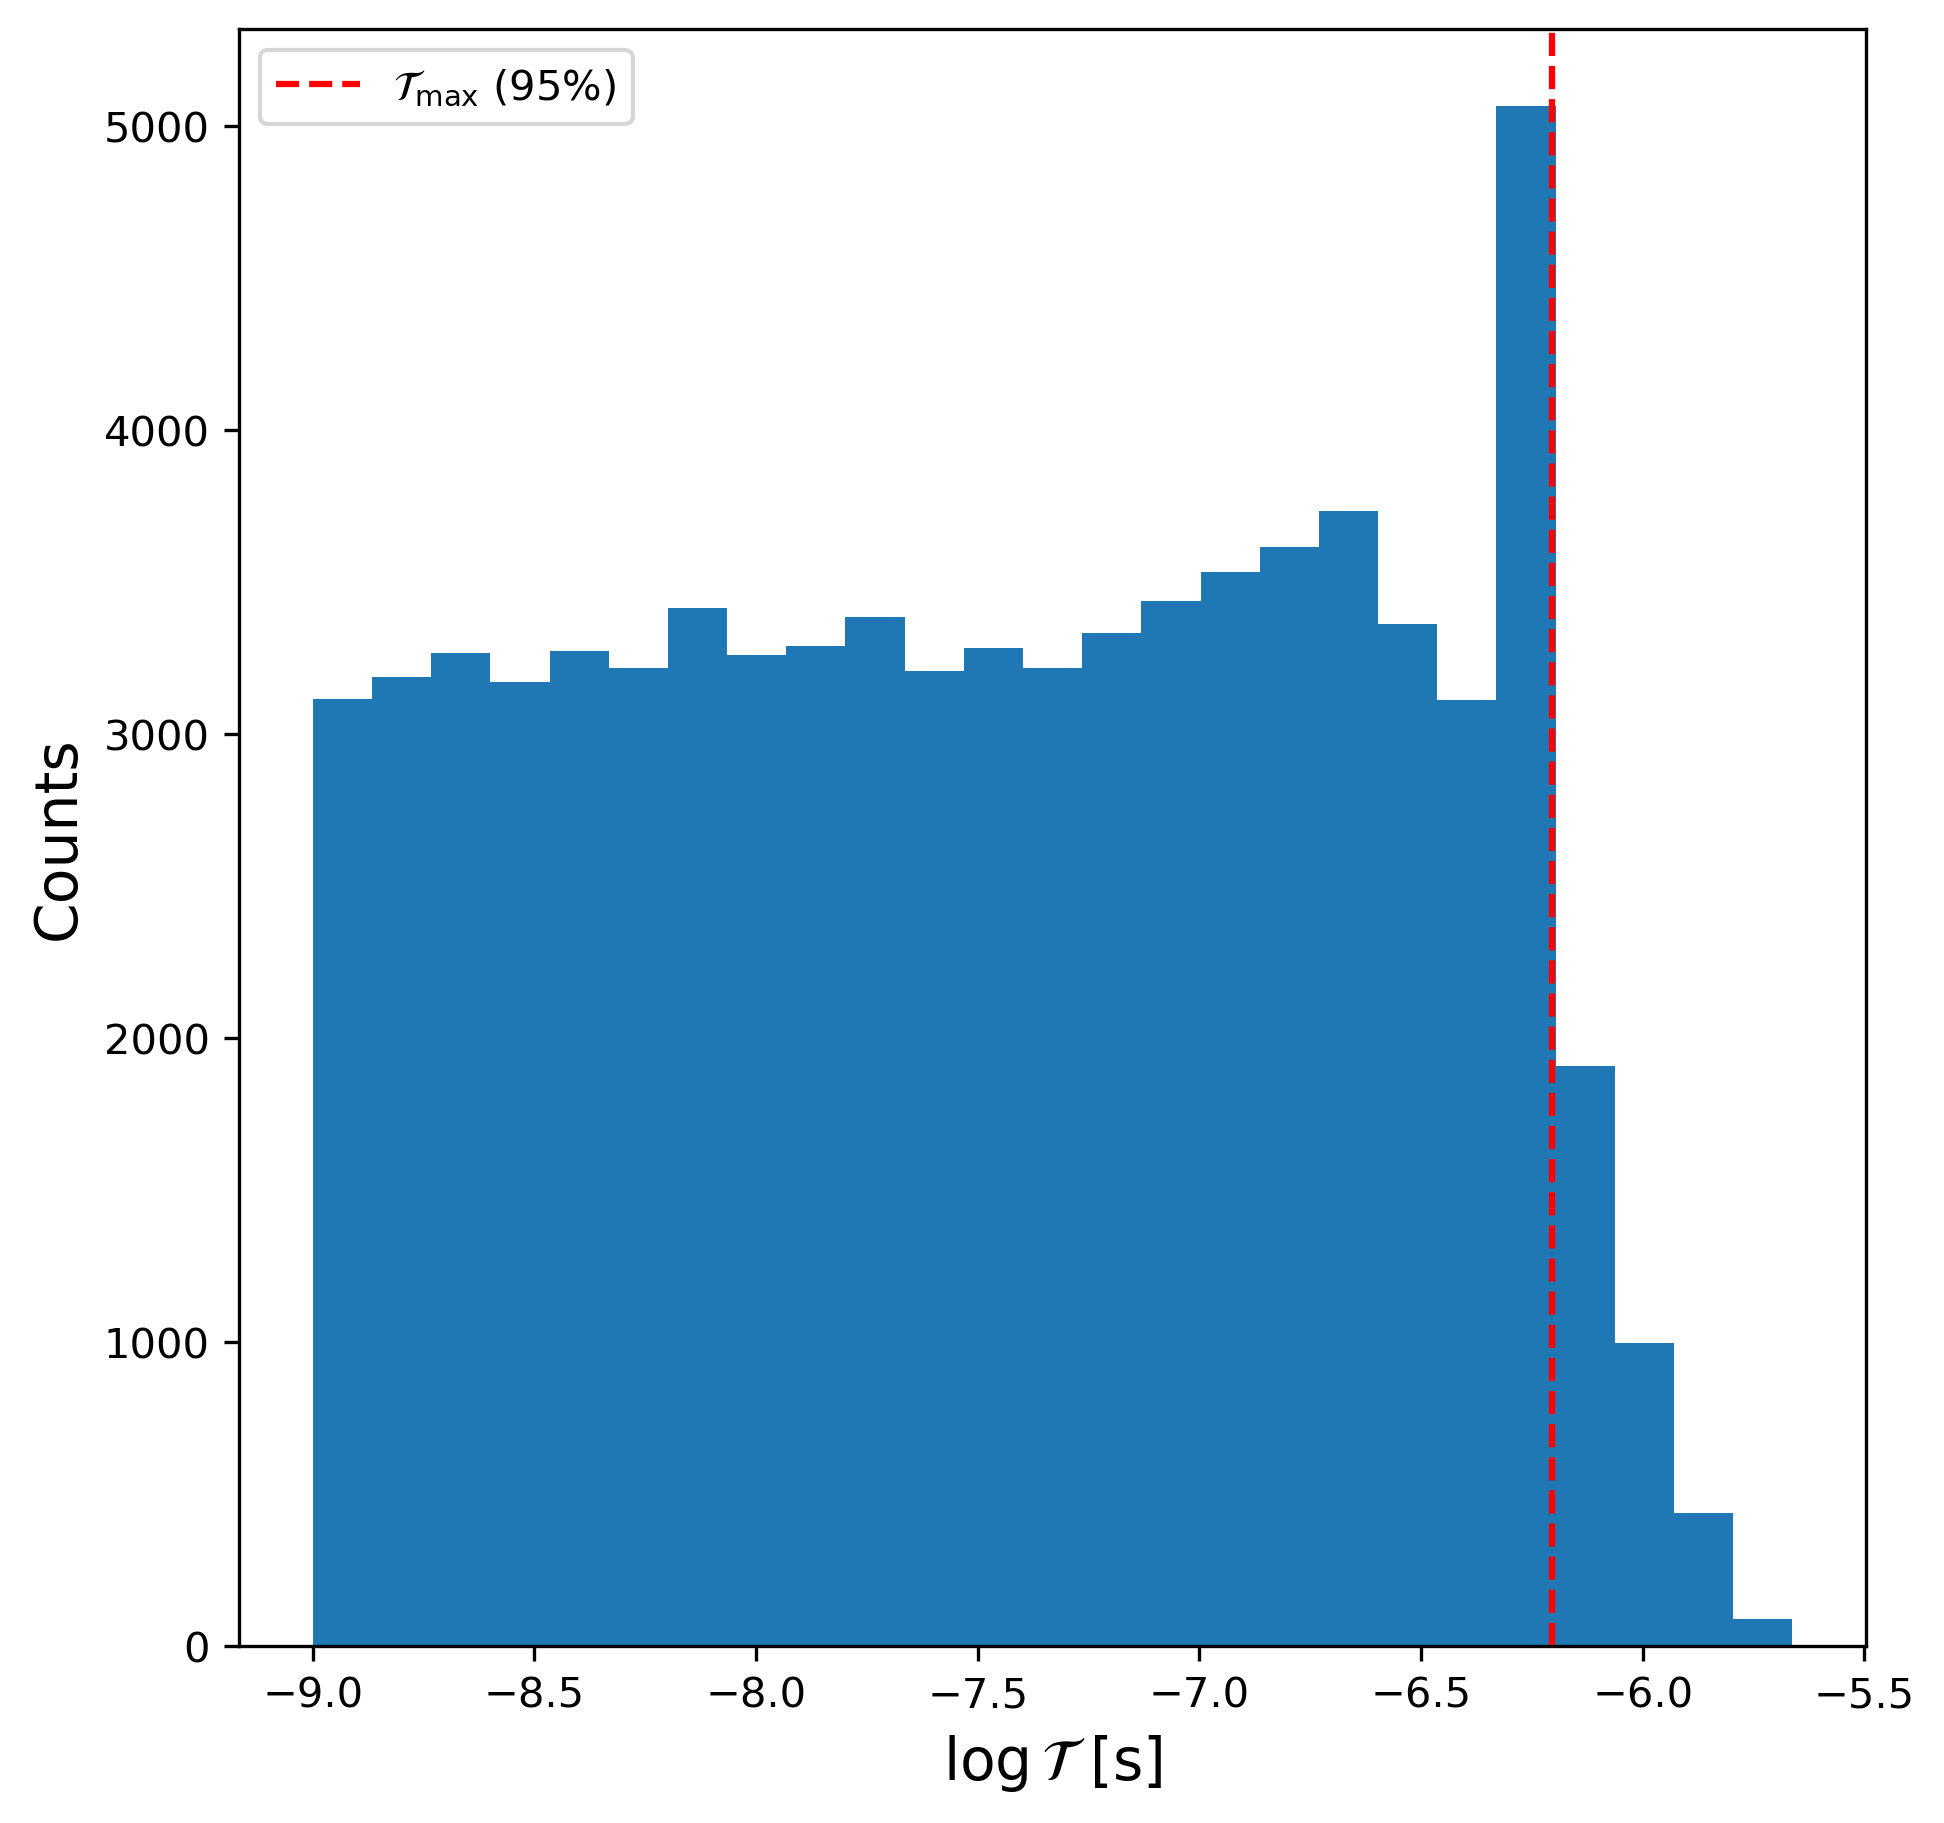

In [19]:
log_T_chain = chain[burn:, 2]
phi_plus_chain = chain[burn:, 5]
nbins = 25

log_T_copy = deepcopy(log_T_chain)
log_T_copy.sort()
L = len(log_T_copy)
log_T_max = log_T_copy[int(L*0.95)]
print(f"{log_T_max=}")
T_max = 10**log_T_max
print(f"{T_max=}")

fig, ax = plt.subplots(1,1, figsize = (7, 7), dpi = 300)
ax.hist(log_T_chain, bins = nbins)
ax.set_xlabel(r'$\log{\mathcal{T}}$ [s]')
ax.set_ylabel("Counts")
ax.axvline(x=log_T_max, color='red', linestyle='--', linewidth=1.5, label = "$\mathcal{T}_{\mathrm{max}}$ (95%)")
ax.legend()
plt.show()

In [20]:
log_T_copy = deepcopy(log_T_chain)
log_T_copy.sort()
L = len(log_T_copy)
log_T_max = log_T_copy[int(L*0.95)]
print(f"{log_T_max=}")
T_max = 10**log_T_max
print(f"{T_max=}")

log_T_max=-6.203771455158535
T_max=6.255017727004273e-07


In [21]:
len(log_T_copy[log_T_copy < -6.203771455158535]) / L

0.9498832165498832

In [22]:
m_c = 0.021
x = 0.073
z = 5*np.pi/180
m_T = 2 * m_c * T_max / (x * z)
print(f"{m_T=}")

m_T=4.123895039602204e-06


PSR J0610-2100
Chain shape = (99900, 10)


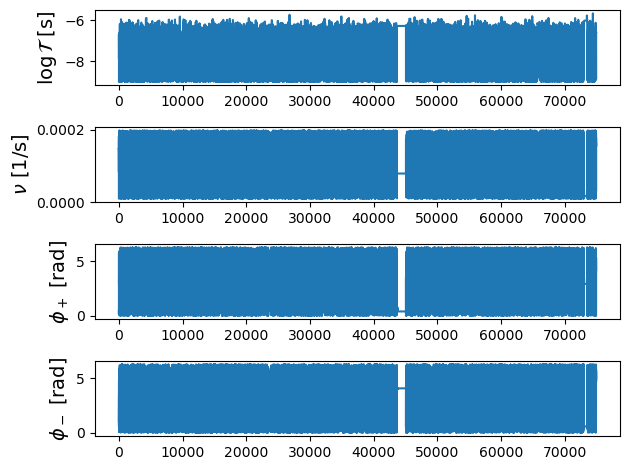

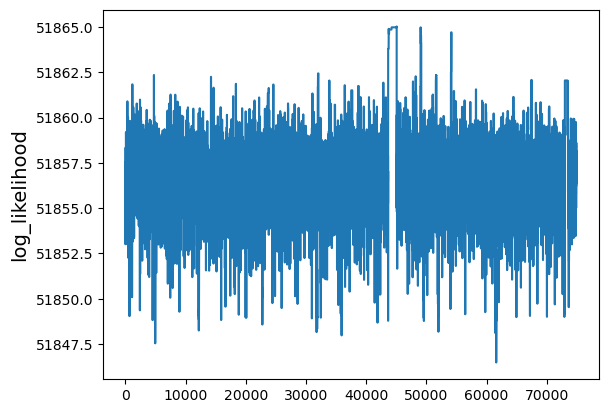

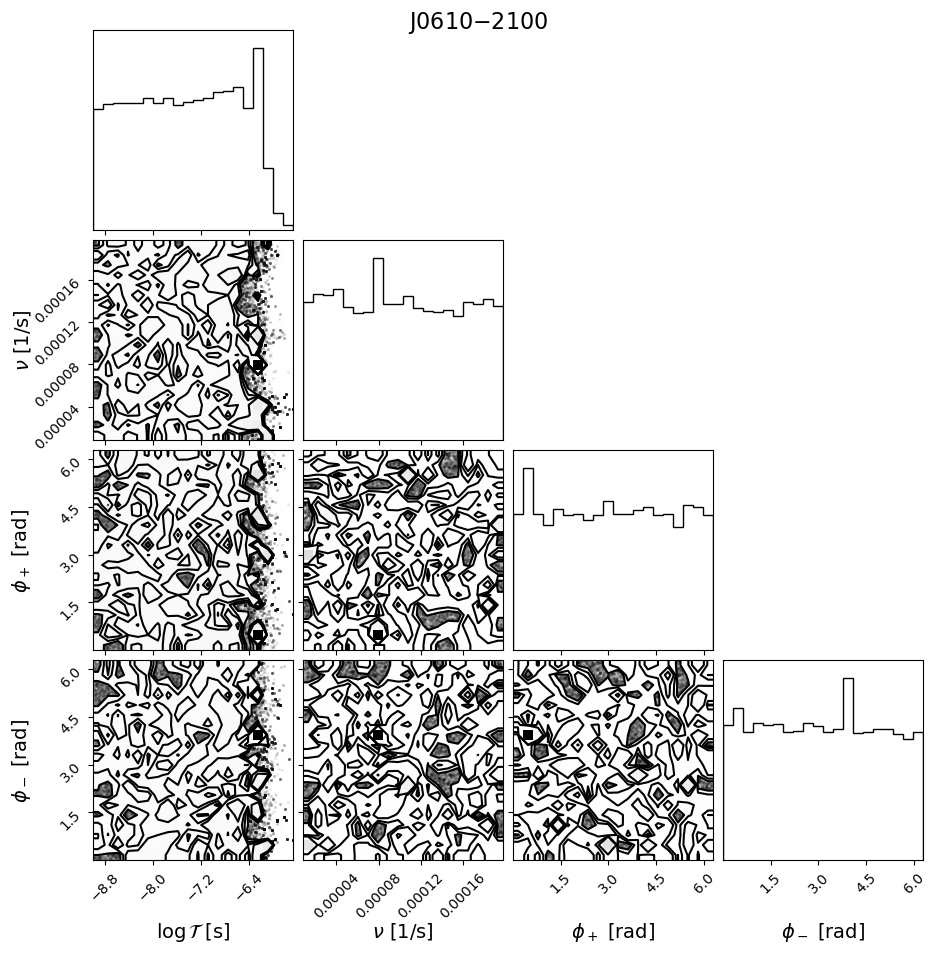

log_T_max=-6.203771455158535
T_max=6.255017727004273e-07


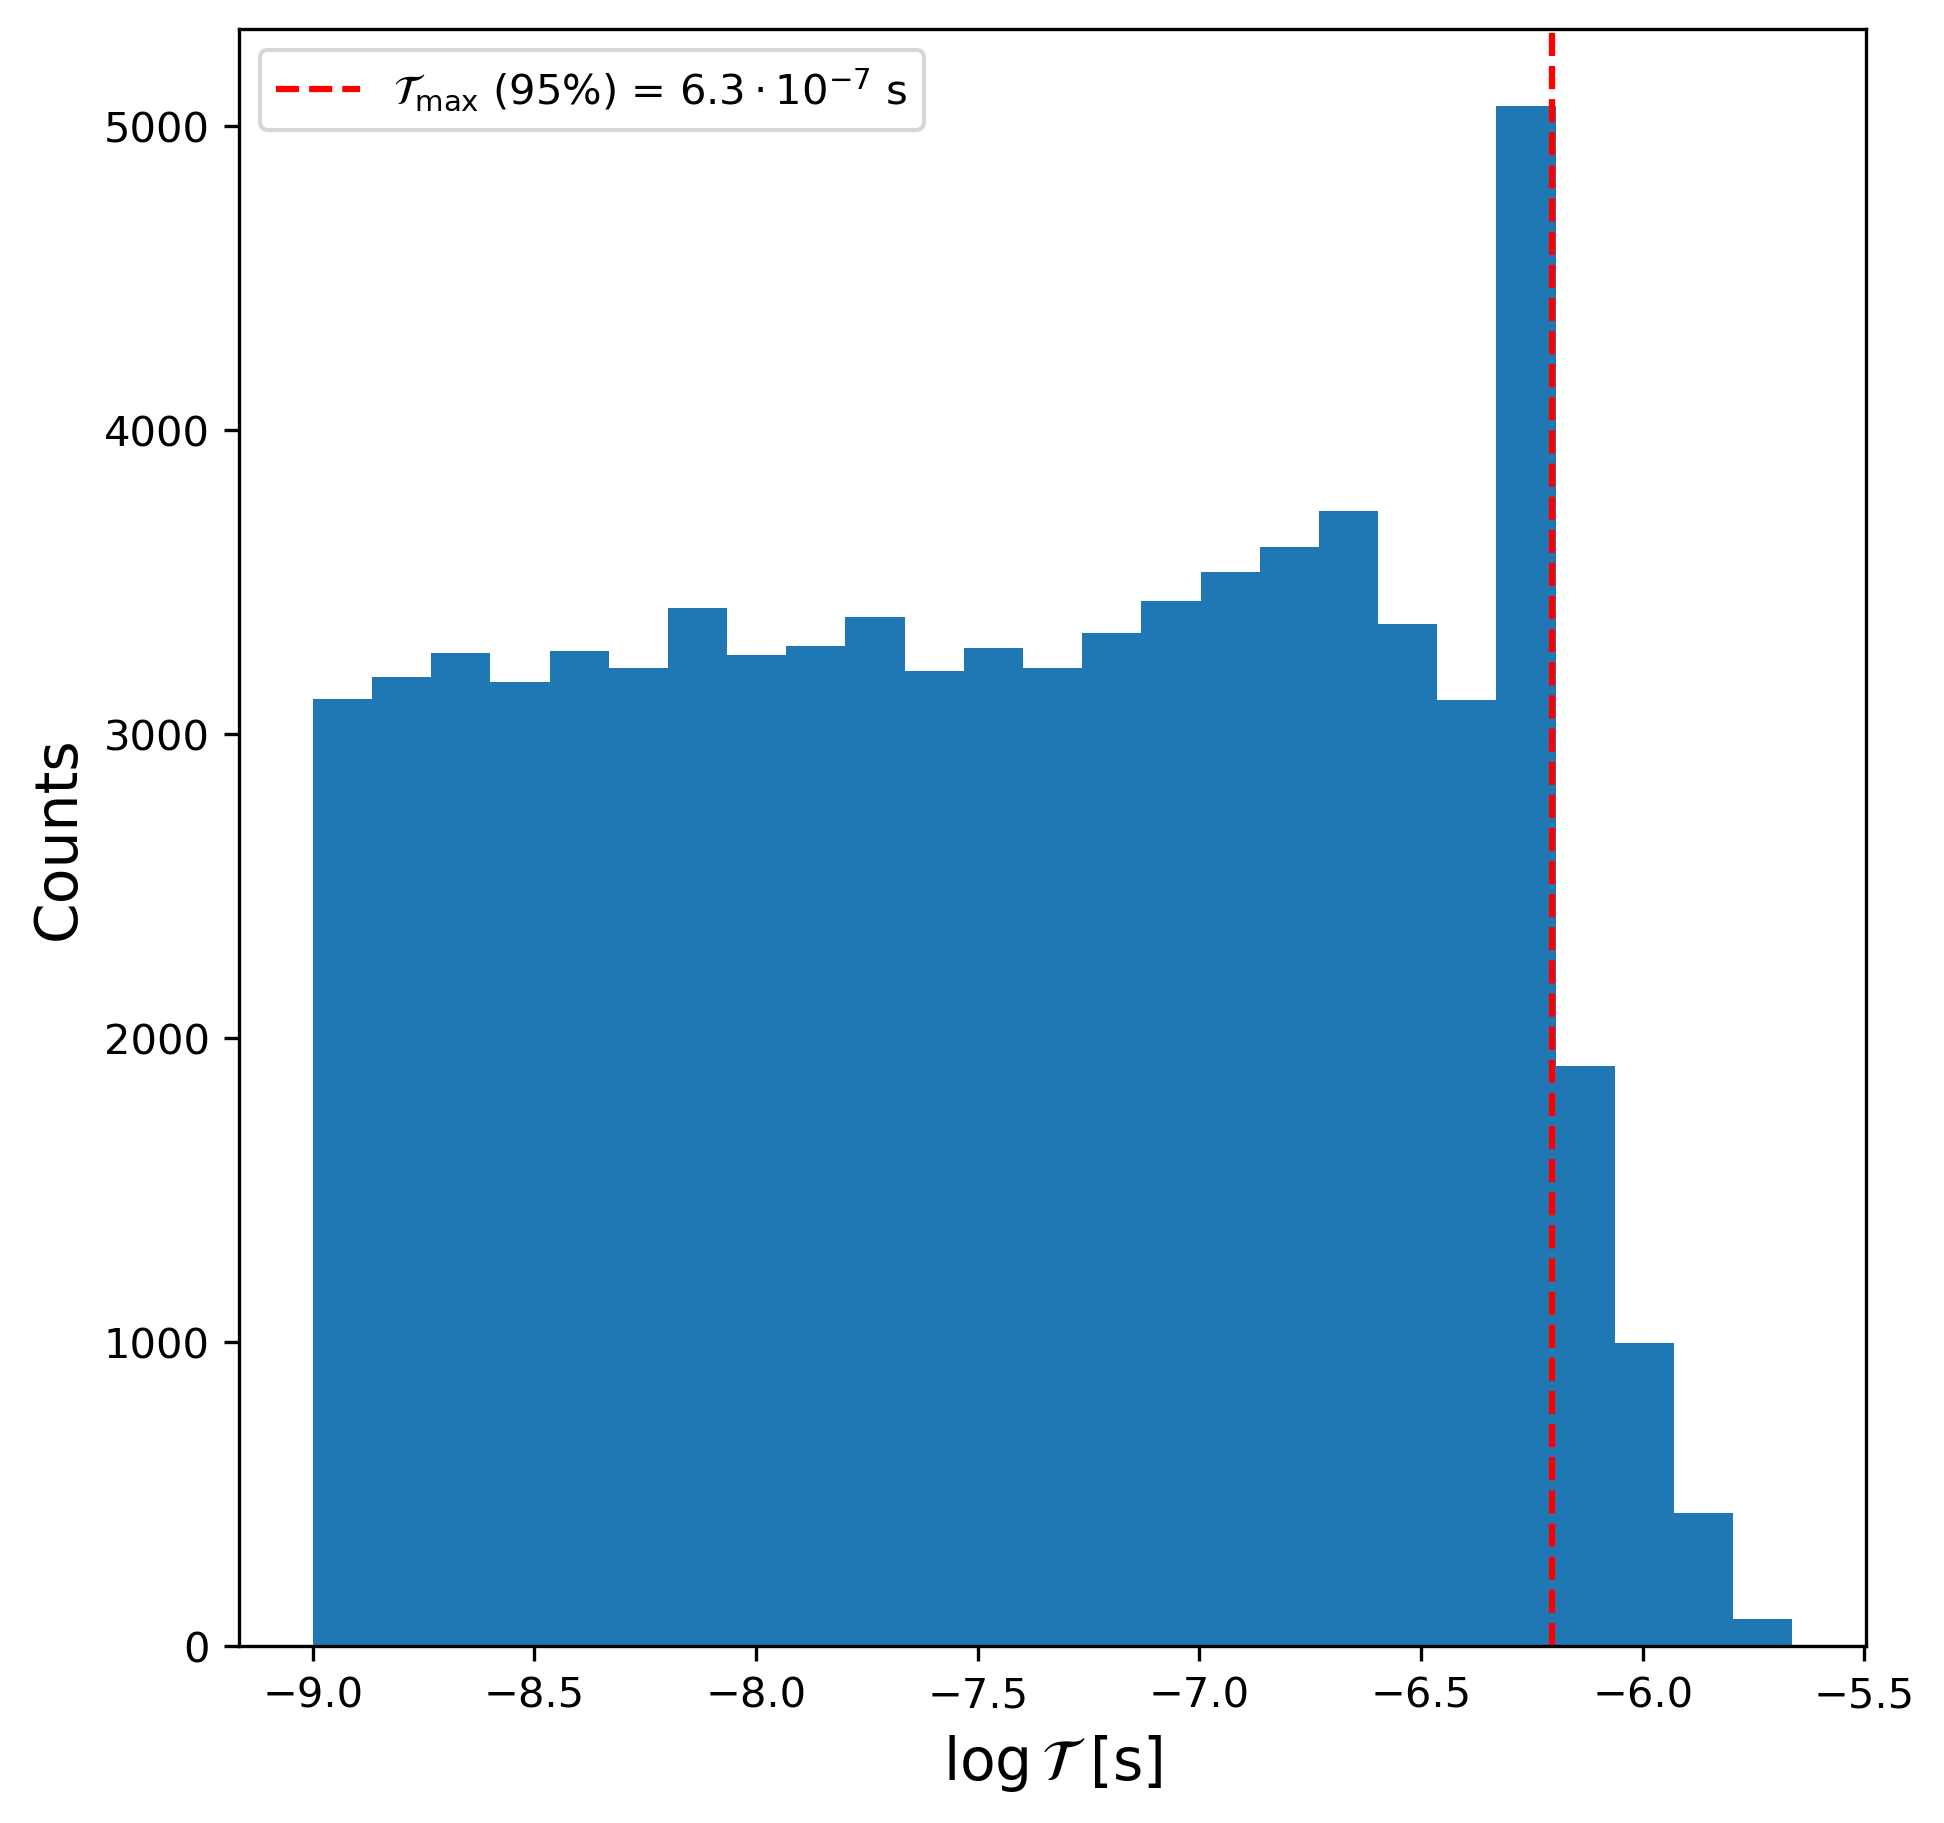

log_T_max=-6.203771455158535
T_max=6.255017727004273e-07
m_T=4.123895039602204e-06


In [23]:
psrlist = ['J0610-2100']
psrlist_formatted = ['J0610$-$2100']
all_chains = {}
psr = None
chain_folder = "/lorule/scratch/jdt00012/chains_12Nov_2024"
if psr is None:
    for k, psr in enumerate(psrlist):
        chain_file = f"{chain_folder}/{psr}/chain_1.txt"
        chain = np.genfromtxt(chain_file)
        print(f"PSR {psr}")
        print(f"Chain shape = {chain.shape}")
       
        ndim = len(params)
        burn = chain.shape[0]//4
        fig, axs = plt.subplots(ndim, 1)
        for i, param in enumerate(params):
            ax = axs[i]
            i+= 2
            ax.plot(chain[burn:, i], ls='-', marker=None, alpha=1.0)
            ax.set_ylabel(param)
        fig.tight_layout()
        plt.show()

        plt.plot(chain[burn:, -3])
        plt.ylabel('log_likelihood')
        plt.show()

        fig = corner.corner(chain[burn:,2:-4], labels=params,  plot_contours=True)
        fig.suptitle(psrlist_formatted[k], fontsize = 16)
        plt.show()
log_T_chain = chain[burn:, 2]
phi_plus_chain = chain[burn:, 5]
nbins = 25

log_T_copy = deepcopy(log_T_chain)
log_T_copy.sort()
L = len(log_T_copy)
log_T_max = log_T_copy[int(L*0.95)]
print(f"{log_T_max=}")
T_max = 10**log_T_max
print(f"{T_max=}")

fig, ax = plt.subplots(1,1, figsize = (7, 7), dpi = 300)
ax.hist(log_T_chain, bins = nbins)
ax.set_xlabel(r'$\log{\mathcal{T}}$ [s]')
ax.set_ylabel("Counts")
ax.axvline(x=log_T_max, color='red', linestyle='--', linewidth=1.5, label = "$\mathcal{T}_{\mathrm{max}}$ (95%) = $6.3\cdot 10^{-7}$ s")
ax.legend()
plt.show()

log_T_copy = deepcopy(log_T_chain)
log_T_copy.sort()
L = len(log_T_copy)
log_T_max = log_T_copy[int(L*0.95)]
print(f"{log_T_max=}")
T_max = 10**log_T_max
print(f"{T_max=}")
m_c = 0.021
x = 0.073
z = 5*np.pi/180
m_T = 2 * m_c * T_max / (x * z)
print(f"{m_T=}")

PSR J1719-1438
Chain shape = (99900, 10)


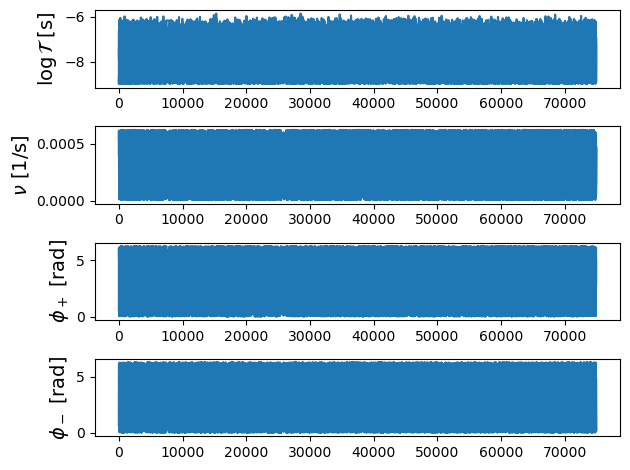

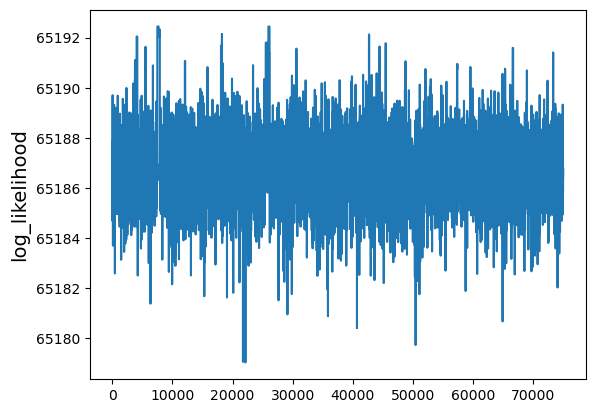

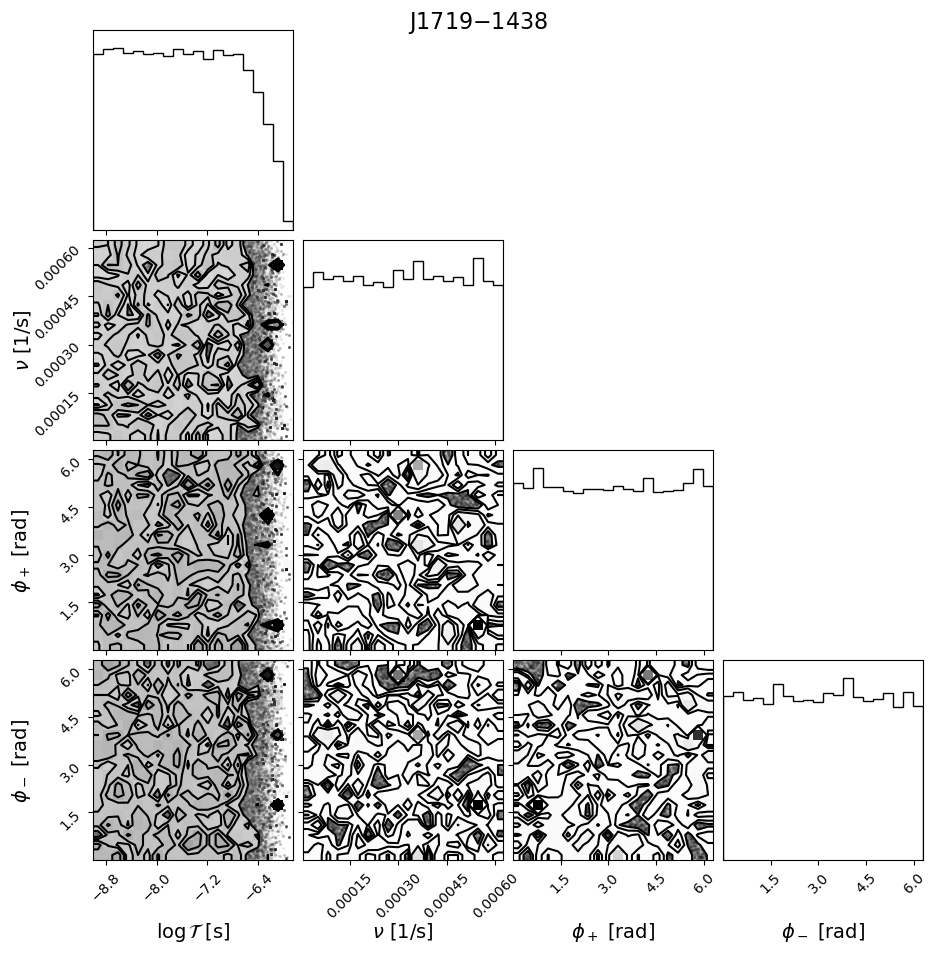

log_T_max=-6.292572208148969
T_max=5.098328229655023e-07


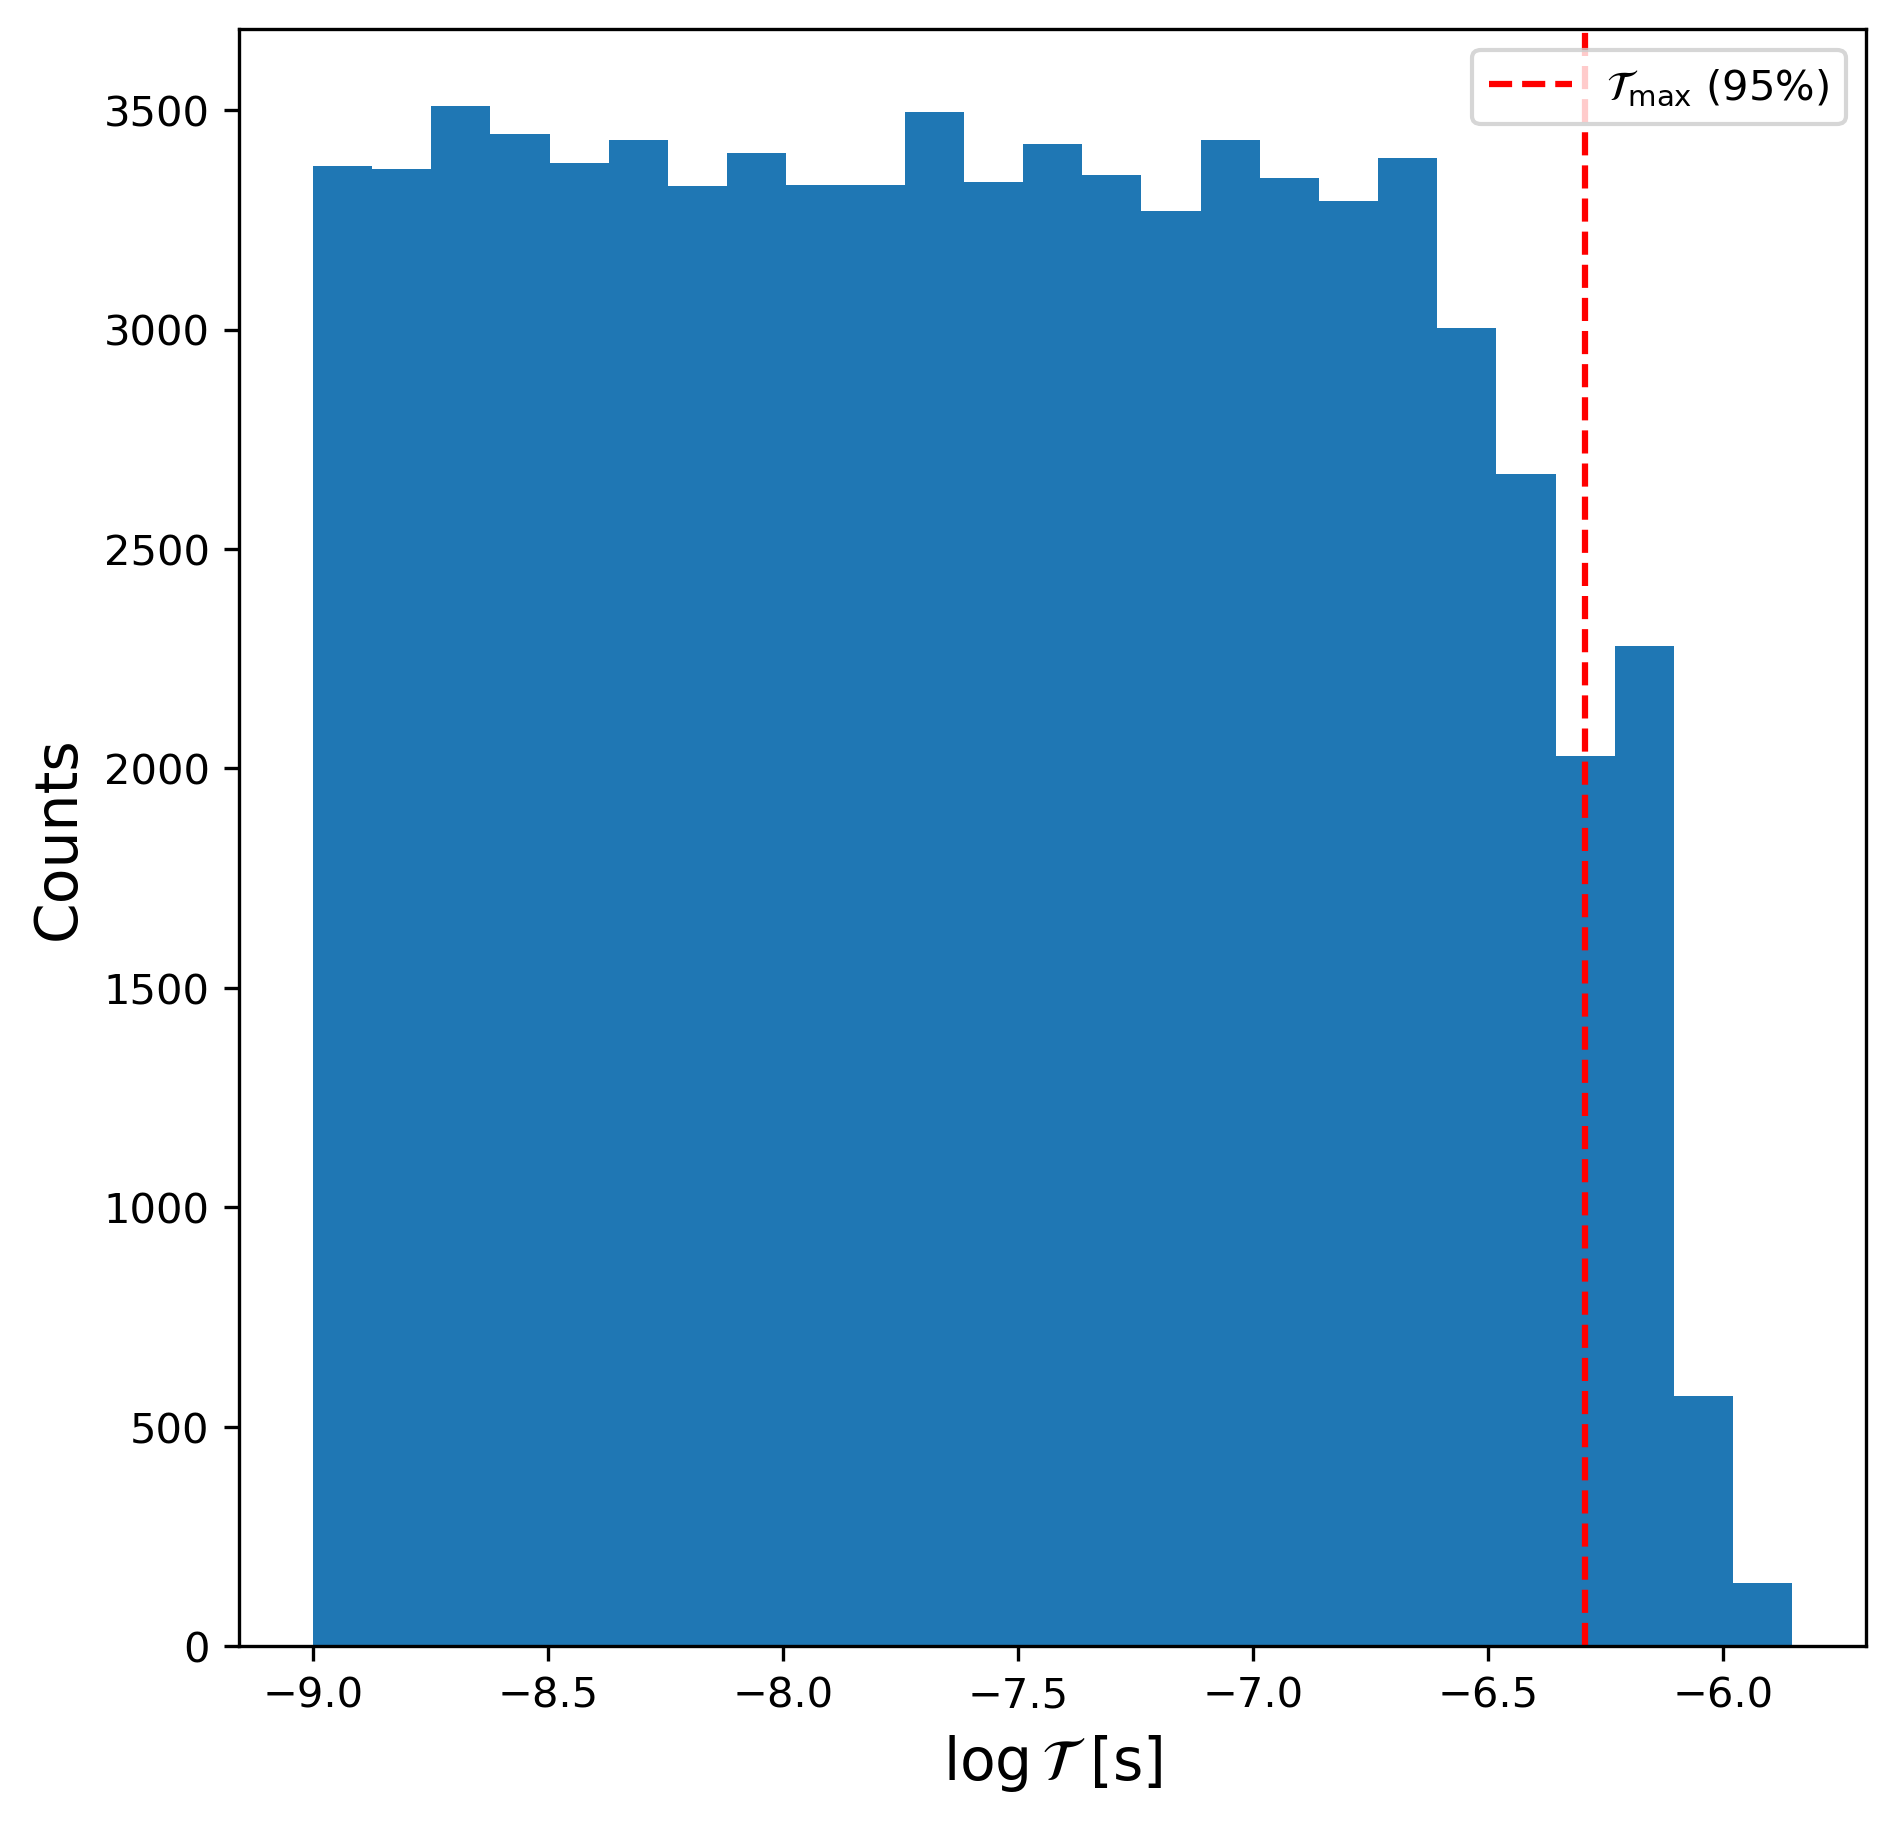

log_T_max=-6.292572208148969
T_max=5.098328229655023e-07
m_T=7.24201977571071e-06


In [24]:
psrlist = ['J1719-1438']
psrlist_formatted = ['J1719$-$1438']
all_chains = {}
psr = None
chain_folder = "/lorule/scratch/jdt00012/chains_12Nov_2024"
if psr is None:
    for k, psr in enumerate(psrlist):
        chain_file = f"{chain_folder}/{psr}/chain_1.txt"
        chain = np.genfromtxt(chain_file)
        print(f"PSR {psr}")
        print(f"Chain shape = {chain.shape}")
       
        ndim = len(params)
        burn = chain.shape[0]//4
        fig, axs = plt.subplots(ndim, 1)
        for i, param in enumerate(params):
            ax = axs[i]
            i+= 2
            ax.plot(chain[burn:, i], ls='-', marker=None, alpha=1.0)
            ax.set_ylabel(param)
        fig.tight_layout()
        plt.show()

        plt.plot(chain[burn:, -3])
        plt.ylabel('log_likelihood')
        plt.show()

        fig = corner.corner(chain[burn:,2:-4], labels=params,  plot_contours=True)
        fig.suptitle(psrlist_formatted[k], fontsize = 16)
        plt.show()
log_T_chain = chain[burn:, 2]
phi_plus_chain = chain[burn:, 5]
nbins = 25

log_T_copy = deepcopy(log_T_chain)
log_T_copy.sort()
L = len(log_T_copy)
log_T_max = log_T_copy[int(L*0.95)]
print(f"{log_T_max=}")
T_max = 10**log_T_max
print(f"{T_max=}")

fig, ax = plt.subplots(1,1, figsize = (7, 7), dpi = 300)
ax.hist(log_T_chain, bins = nbins)
ax.set_xlabel(r'$\log{\mathcal{T}}$ [s]')
ax.set_ylabel("Counts")
ax.axvline(x=log_T_max, color='red', linestyle='--', linewidth=1.5, label = "$\mathcal{T}_{\mathrm{max}}$ (95%)")
ax.legend()
plt.show()

log_T_copy = deepcopy(log_T_chain)
log_T_copy.sort()
L = len(log_T_copy)
log_T_max = log_T_copy[int(L*0.95)]
print(f"{log_T_max=}")
T_max = 10**log_T_max
print(f"{T_max=}")
m_c = 0.001129
x = 0.0018215649079817854
z = 5*np.pi/180
m_T = 2 * m_c * T_max / (x * z)
print(f"{m_T=}")

PSR J1745+1017
Chain shape = (99900, 10)


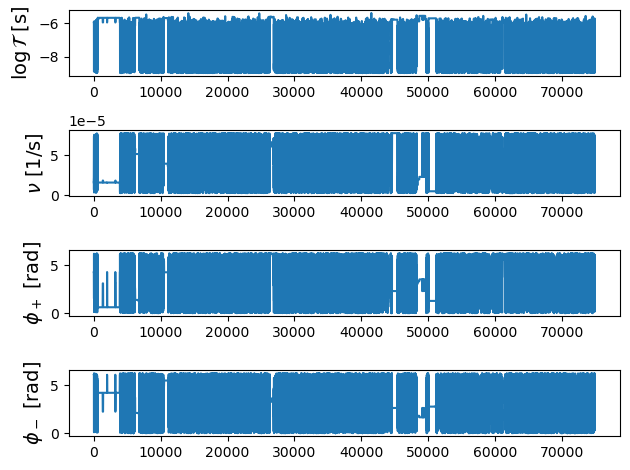

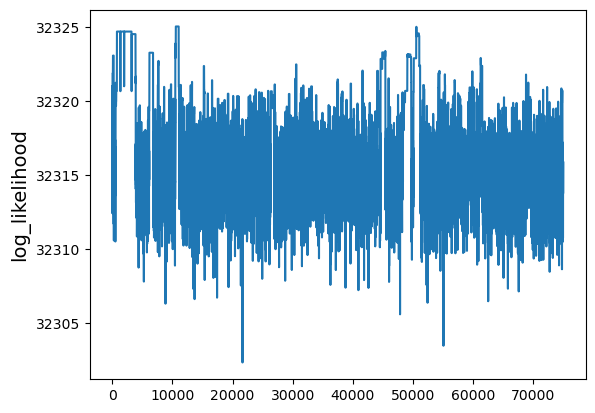

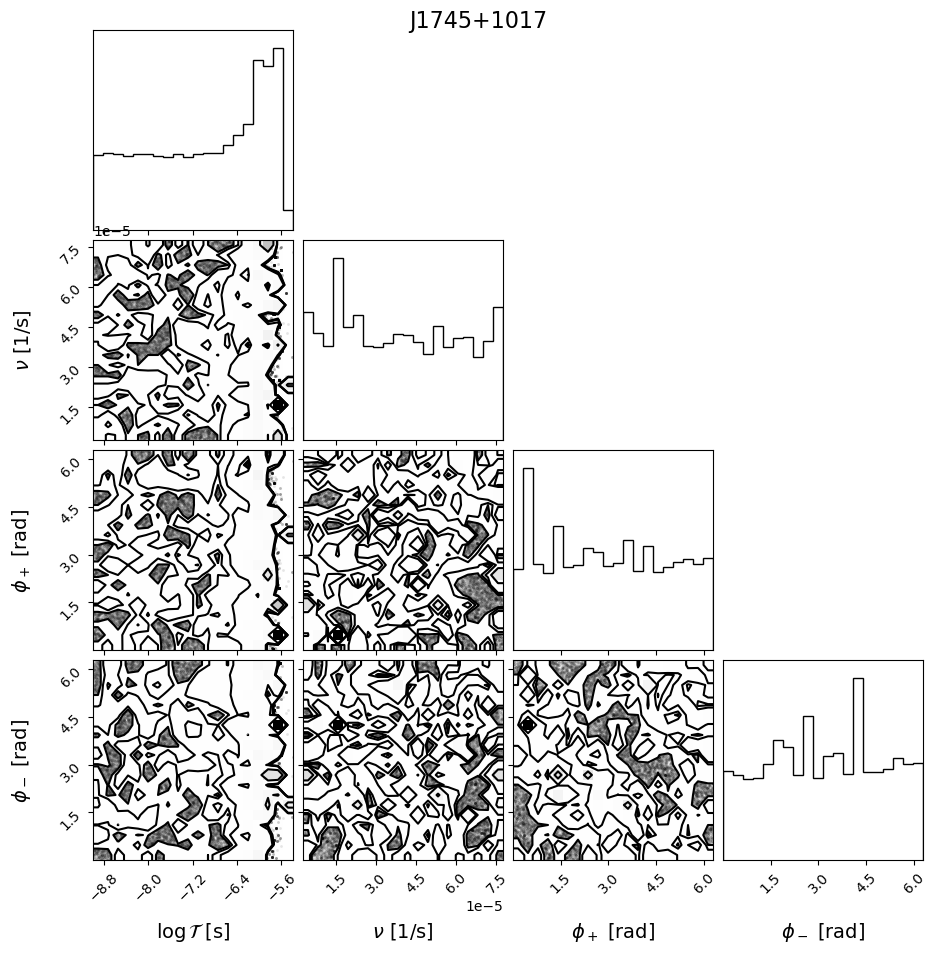

log_T_max=-5.6748600749101845
T_max=2.114170093365364e-06


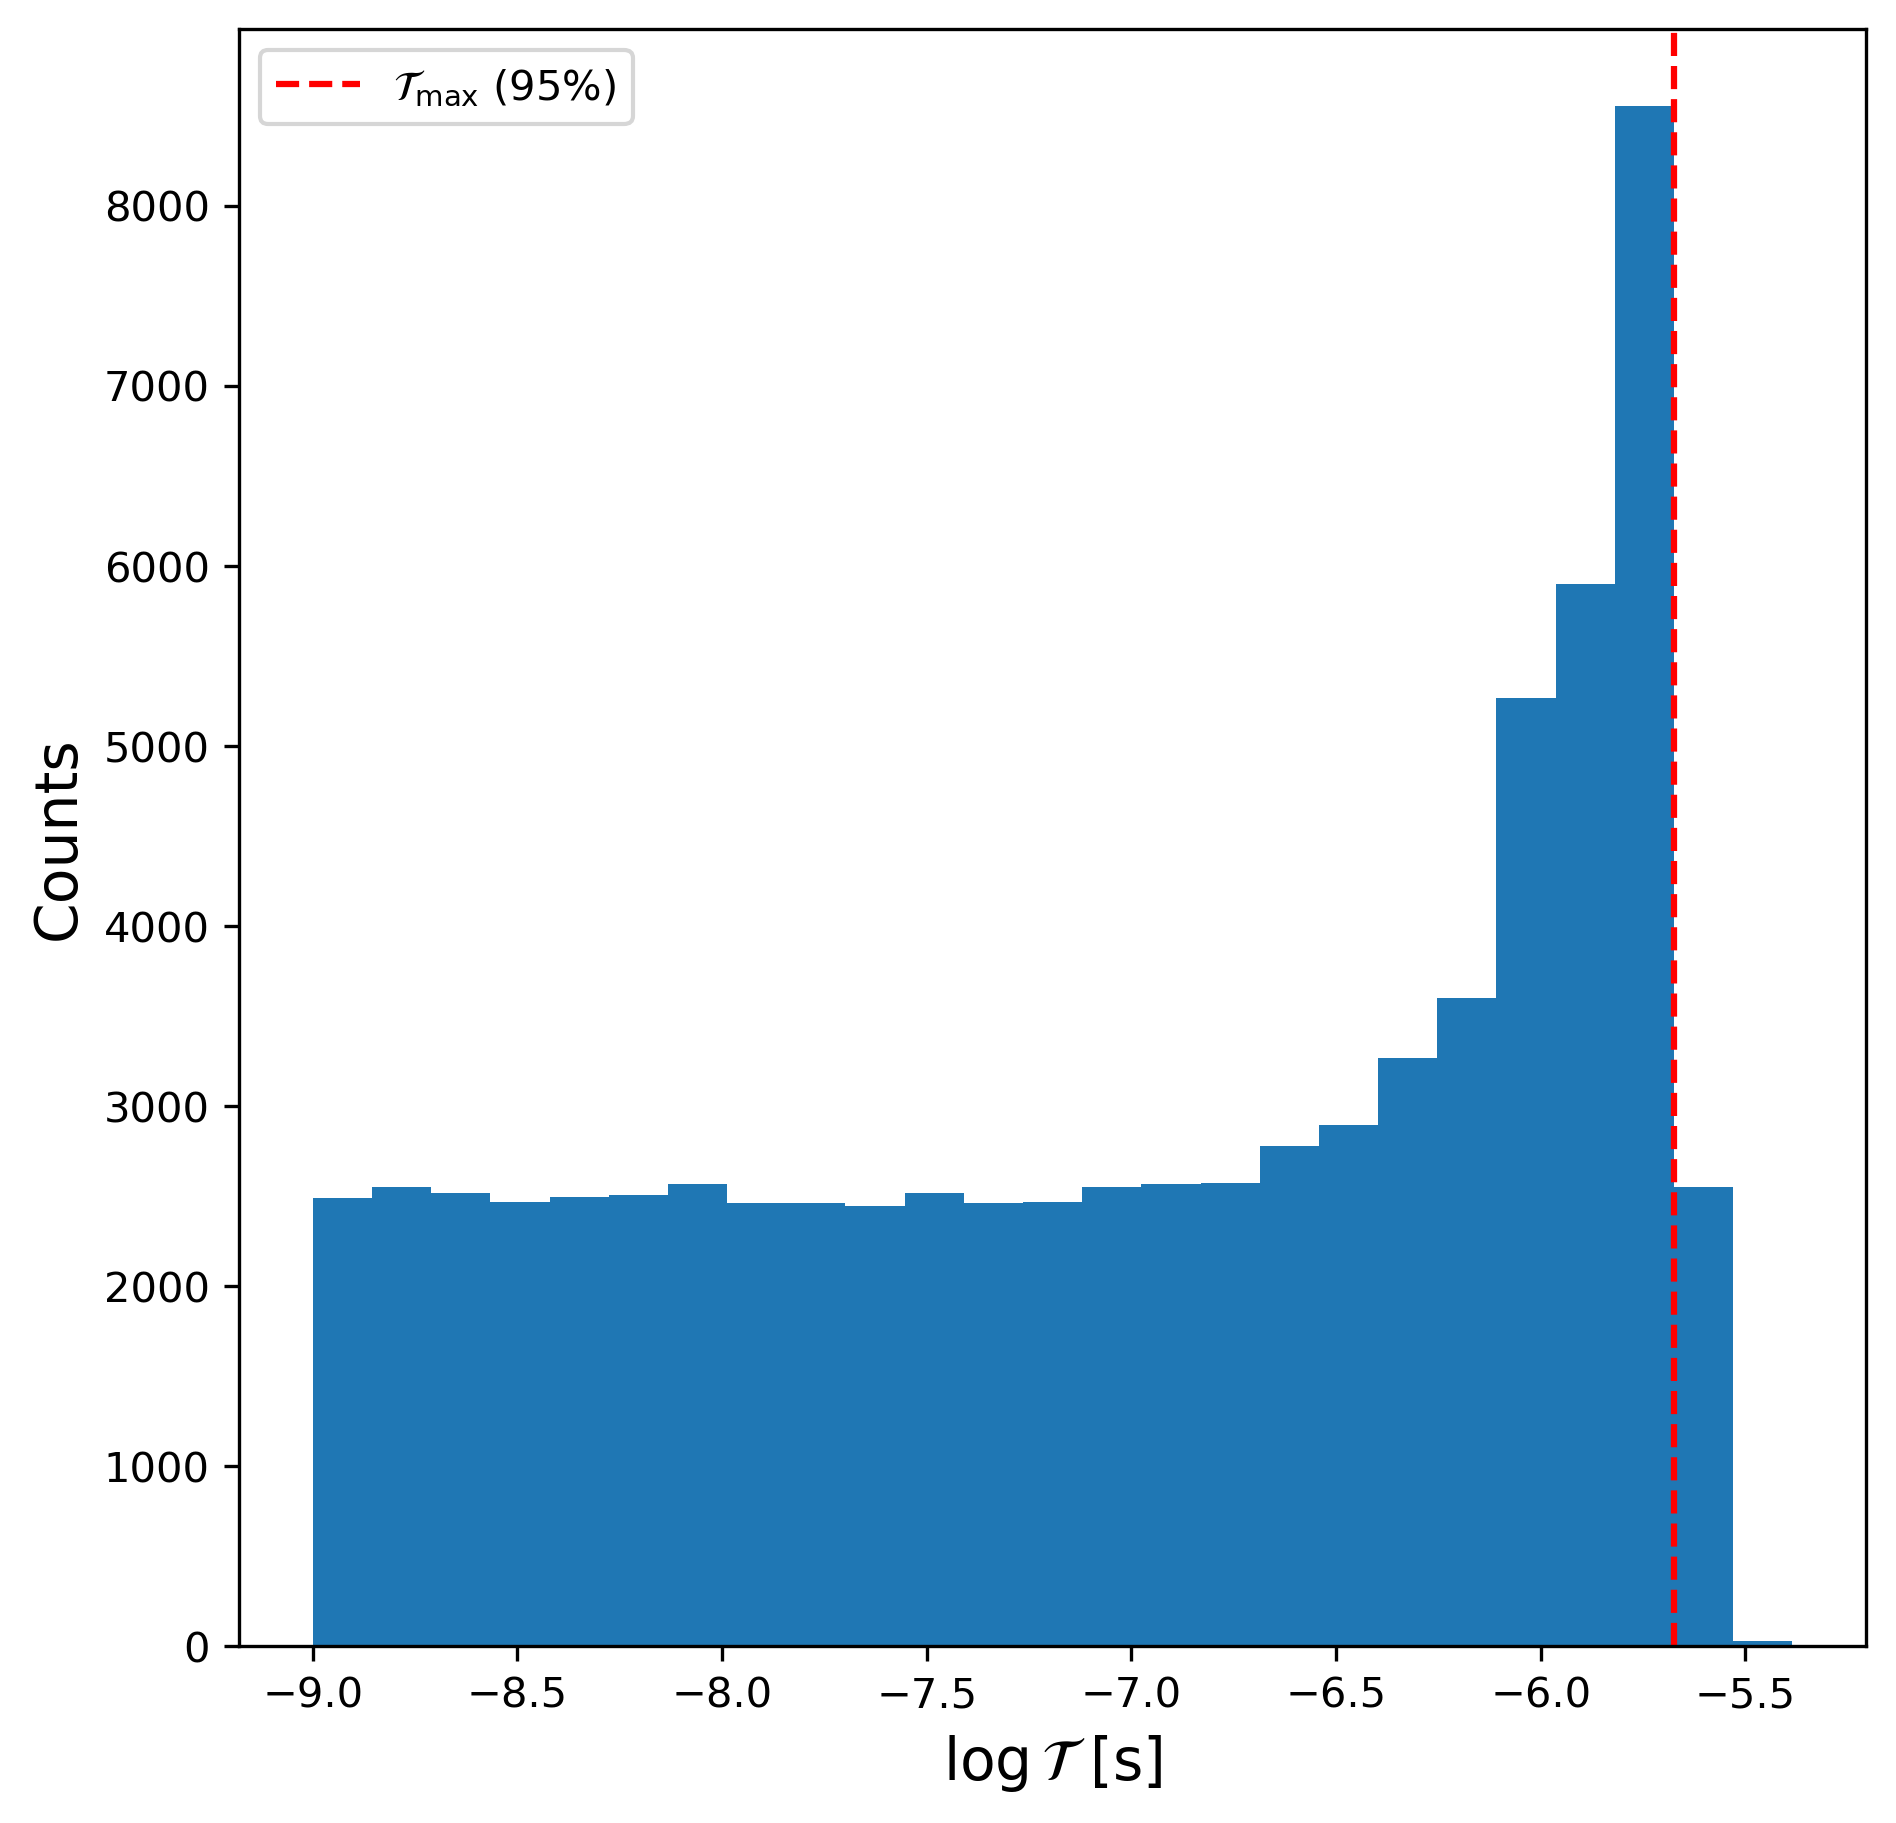

log_T_max=-5.6748600749101845
T_max=2.114170093365364e-06
m_T=7.524367549989777e-06


In [25]:
psrlist = ['J1745+1017']
psrlist_formatted = ['J1745+1017']
all_chains = {}
psr = None
chain_folder = "/lorule/scratch/jdt00012/chains_12Nov_2024"
if psr is None:
    for k, psr in enumerate(psrlist):
        chain_file = f"{chain_folder}/{psr}/chain_1.txt"
        chain = np.genfromtxt(chain_file)
        print(f"PSR {psr}")
        print(f"Chain shape = {chain.shape}")
       
        ndim = len(params)
        burn = chain.shape[0]//4
        fig, axs = plt.subplots(ndim, 1)
        for i, param in enumerate(params):
            ax = axs[i]
            i+= 2
            ax.plot(chain[burn:, i], ls='-', marker=None, alpha=1.0)
            ax.set_ylabel(param)
        fig.tight_layout()
        plt.show()

        plt.plot(chain[burn:, -3])
        plt.ylabel('log_likelihood')
        plt.show()

        fig = corner.corner(chain[burn:,2:-4], labels=params,  plot_contours=True)
        fig.suptitle(psrlist_formatted[k], fontsize = 16)
        plt.show()
log_T_chain = chain[burn:, 2]
phi_plus_chain = chain[burn:, 5]
nbins = 25

log_T_copy = deepcopy(log_T_chain)
log_T_copy.sort()
L = len(log_T_copy)
log_T_max = log_T_copy[int(L*0.95)]
print(f"{log_T_max=}")
T_max = 10**log_T_max
print(f"{T_max=}")

fig, ax = plt.subplots(1,1, figsize = (7, 7), dpi = 300)
ax.hist(log_T_chain, bins = nbins)
ax.set_xlabel(r'$\log{\mathcal{T}}$ [s]')
ax.set_ylabel("Counts")
ax.axvline(x=log_T_max, color='red', linestyle='--', linewidth=1.5, label = "$\mathcal{T}_{\mathrm{max}}$ (95%)")
ax.legend()
plt.show()

log_T_copy = deepcopy(log_T_chain)
log_T_copy.sort()
L = len(log_T_copy)
log_T_max = log_T_copy[int(L*0.95)]
print(f"{log_T_max=}")
T_max = 10**log_T_max
print(f"{T_max=}")
m_c = 0.013692
x = 0.08816971510509967
z = 5*np.pi/180
m_T = 2 * m_c * T_max / (x * z)
print(f"{m_T=}")

PSR J2214+3000
Chain shape = (99900, 10)


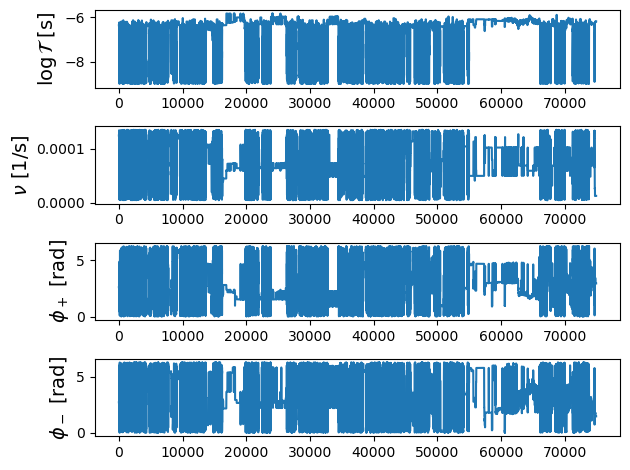

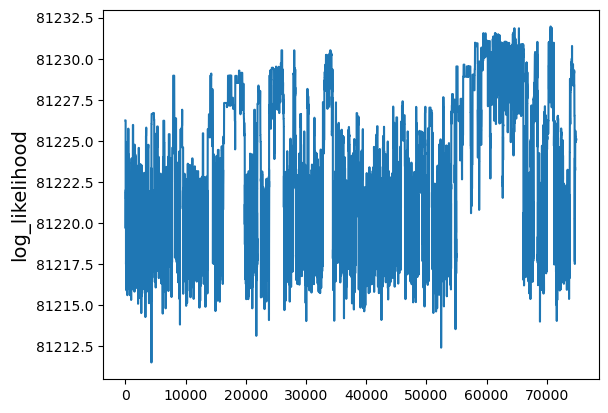

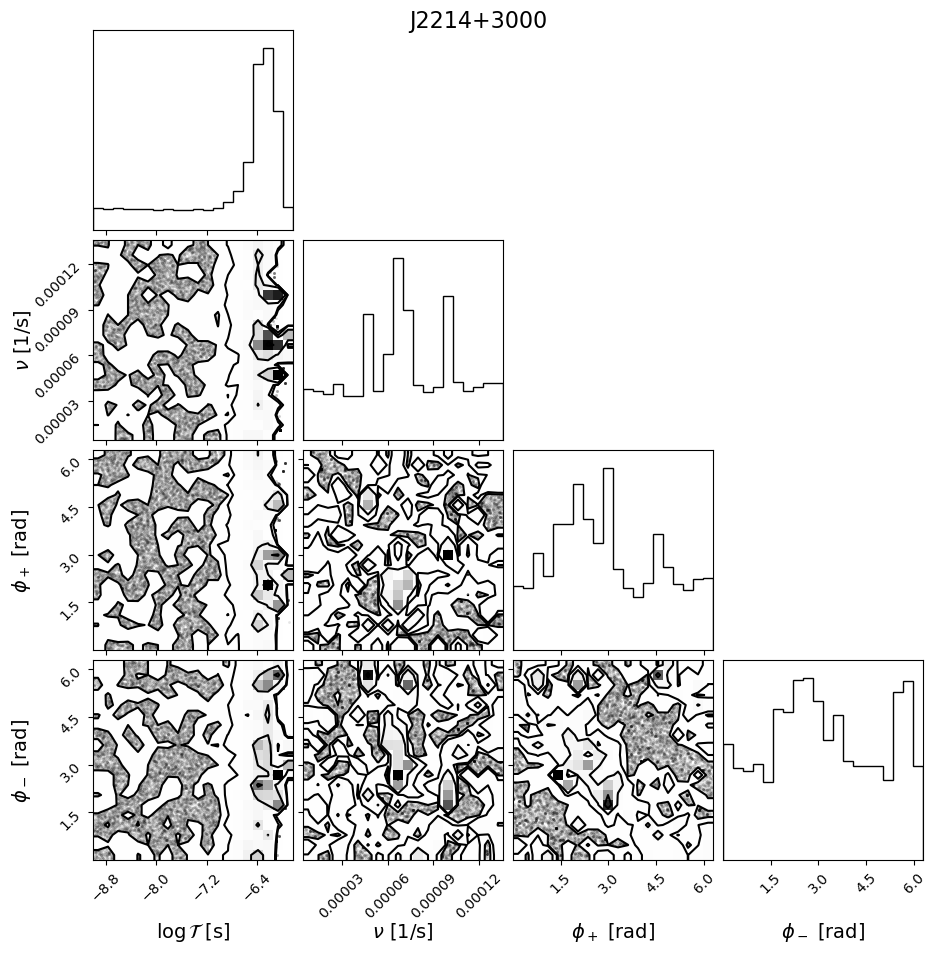

log_T_max=-6.005870906693775
T_max=9.865726991303007e-07


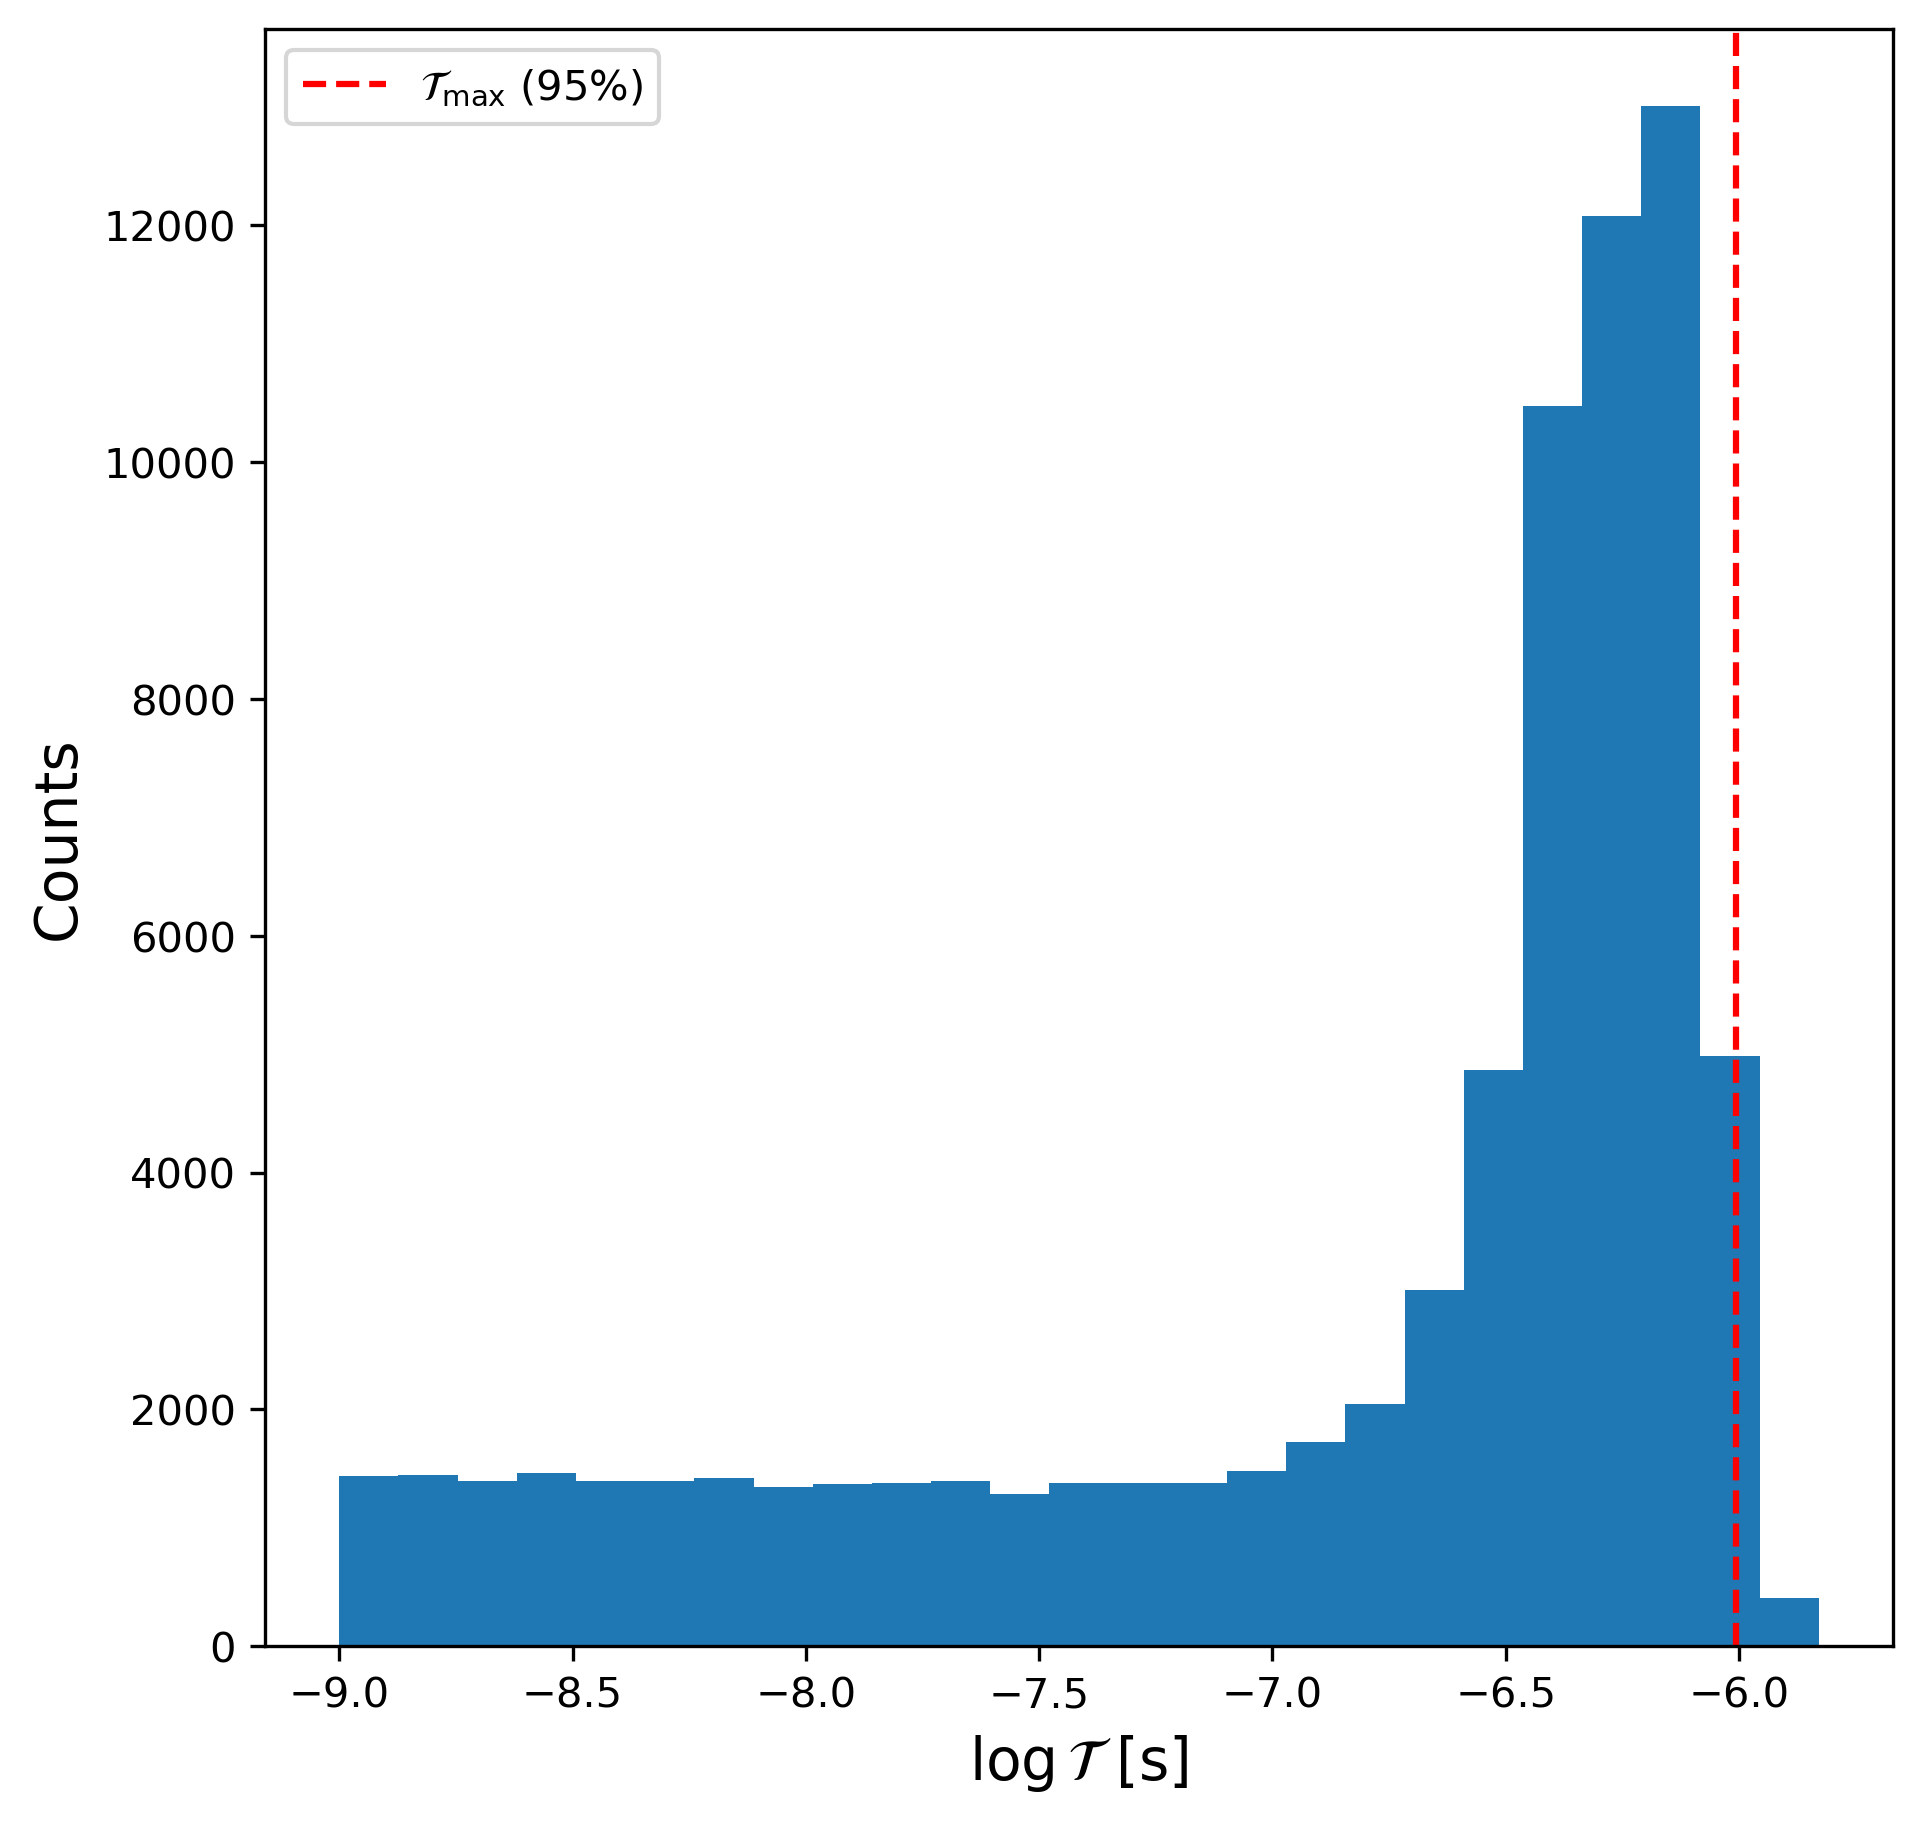

log_T_max=-6.005870906693775
T_max=9.865726991303007e-07
m_T=5.103325927291457e-06


In [26]:
psrlist = ['J2214+3000']
psrlist_formatted = ['J2214+3000']
all_chains = {}
psr = None
chain_folder = "/lorule/scratch/jdt00012/chains_12Nov_2024"
if psr is None:
    for k, psr in enumerate(psrlist):
        chain_file = f"{chain_folder}/{psr}/chain_1.txt"
        chain = np.genfromtxt(chain_file)
        print(f"PSR {psr}")
        print(f"Chain shape = {chain.shape}")
       
        ndim = len(params)
        burn = chain.shape[0]//4
        fig, axs = plt.subplots(ndim, 1)
        for i, param in enumerate(params):
            ax = axs[i]
            i+= 2
            ax.plot(chain[burn:, i], ls='-', marker=None, alpha=1.0)
            ax.set_ylabel(param)
        fig.tight_layout()
        plt.show()

        plt.plot(chain[burn:, -3])
        plt.ylabel('log_likelihood')
        plt.show()

        fig = corner.corner(chain[burn:,2:-4], labels=params,  plot_contours=True)
        fig.suptitle(psrlist_formatted[k], fontsize = 16)
        plt.show()
log_T_chain = chain[burn:, 2]
phi_plus_chain = chain[burn:, 5]
nbins = 25

log_T_copy = deepcopy(log_T_chain)
log_T_copy.sort()
L = len(log_T_copy)
log_T_max = log_T_copy[int(L*0.95)]
print(f"{log_T_max=}")
T_max = 10**log_T_max
print(f"{T_max=}")

fig, ax = plt.subplots(1,1, figsize = (7, 7), dpi = 300)
ax.hist(log_T_chain, bins = nbins)
ax.set_xlabel(r'$\log{\mathcal{T}}$ [s]')
ax.set_ylabel("Counts")
ax.axvline(x=log_T_max, color='red', linestyle='--', linewidth=1.5, label = "$\mathcal{T}_{\mathrm{max}}$ (95%)")
ax.legend()
plt.show()

log_T_copy = deepcopy(log_T_chain)
log_T_copy.sort()
L = len(log_T_copy)
log_T_max = log_T_copy[int(L*0.95)]
print(f"{log_T_max=}")
T_max = 10**log_T_max
print(f"{T_max=}")
m_c = 0.013335
x = 0.05908148890082091
z = 5*np.pi/180
m_T = 2 * m_c * T_max / (x * z)
print(f"{m_T=}")

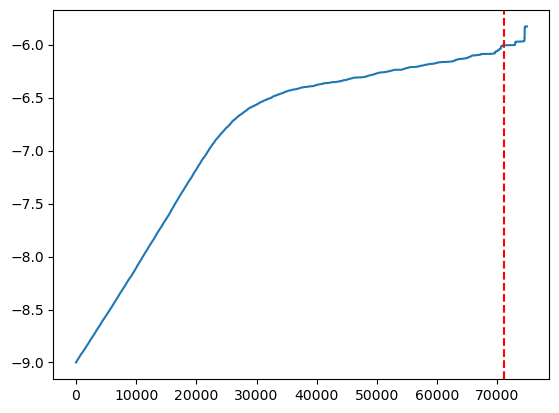

In [31]:
plt.plot(log_T_copy)
plt.axvline(x=L*0.95, color='red', linestyle='--', linewidth=1.5,)

PSR J2234+0944
Chain shape = (99900, 10)


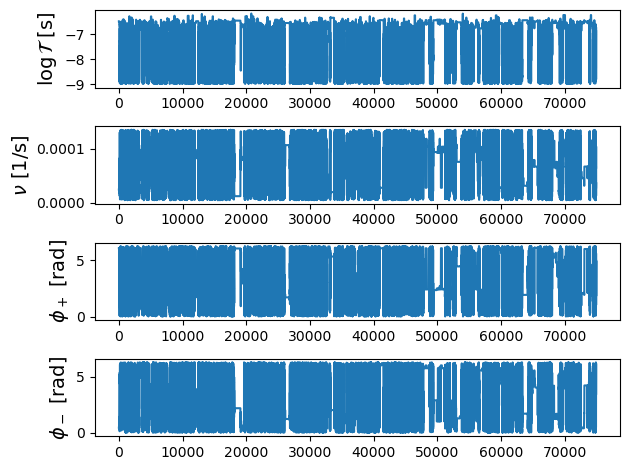

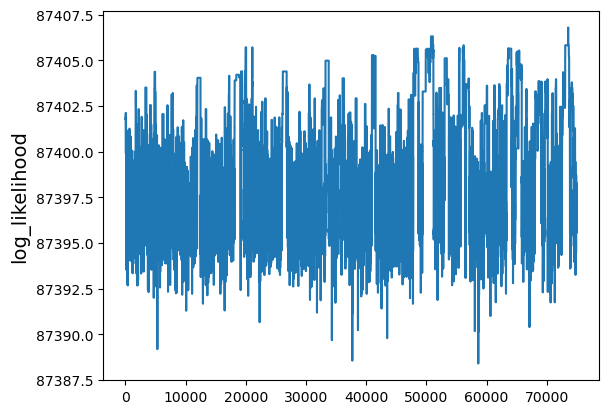

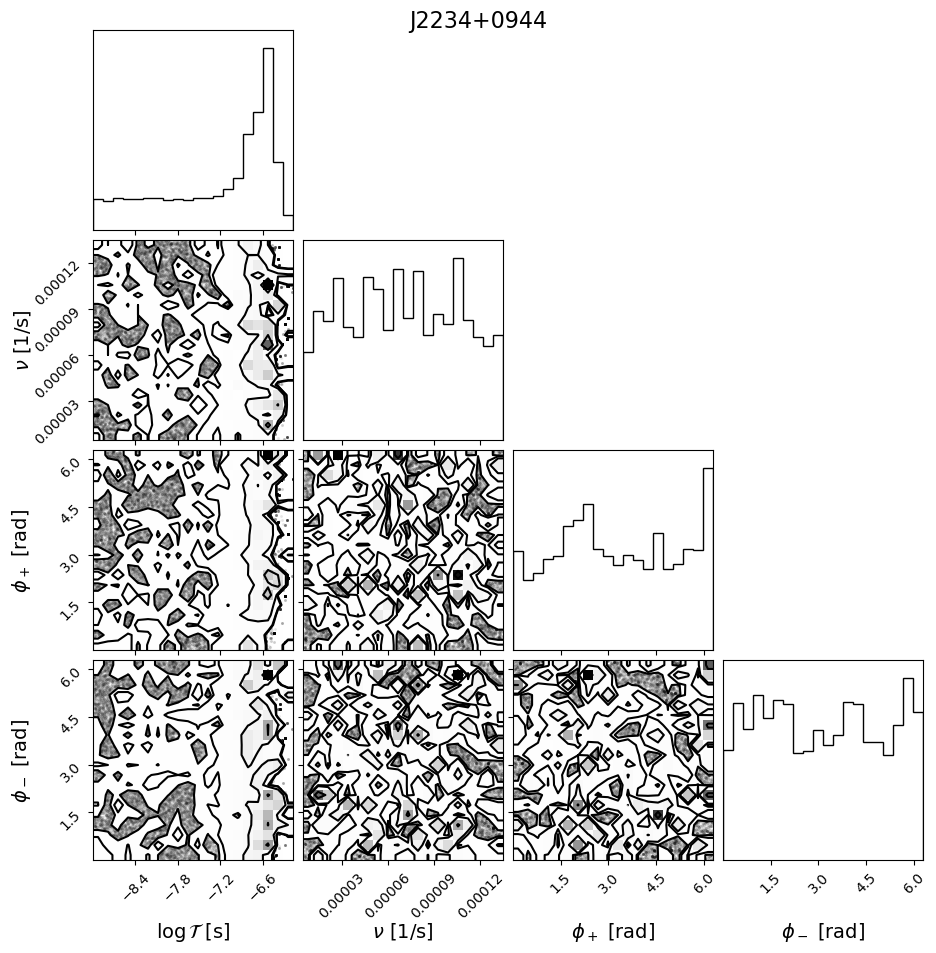

log_T_max=-6.435088508550085
T_max=3.6720745655470875e-07


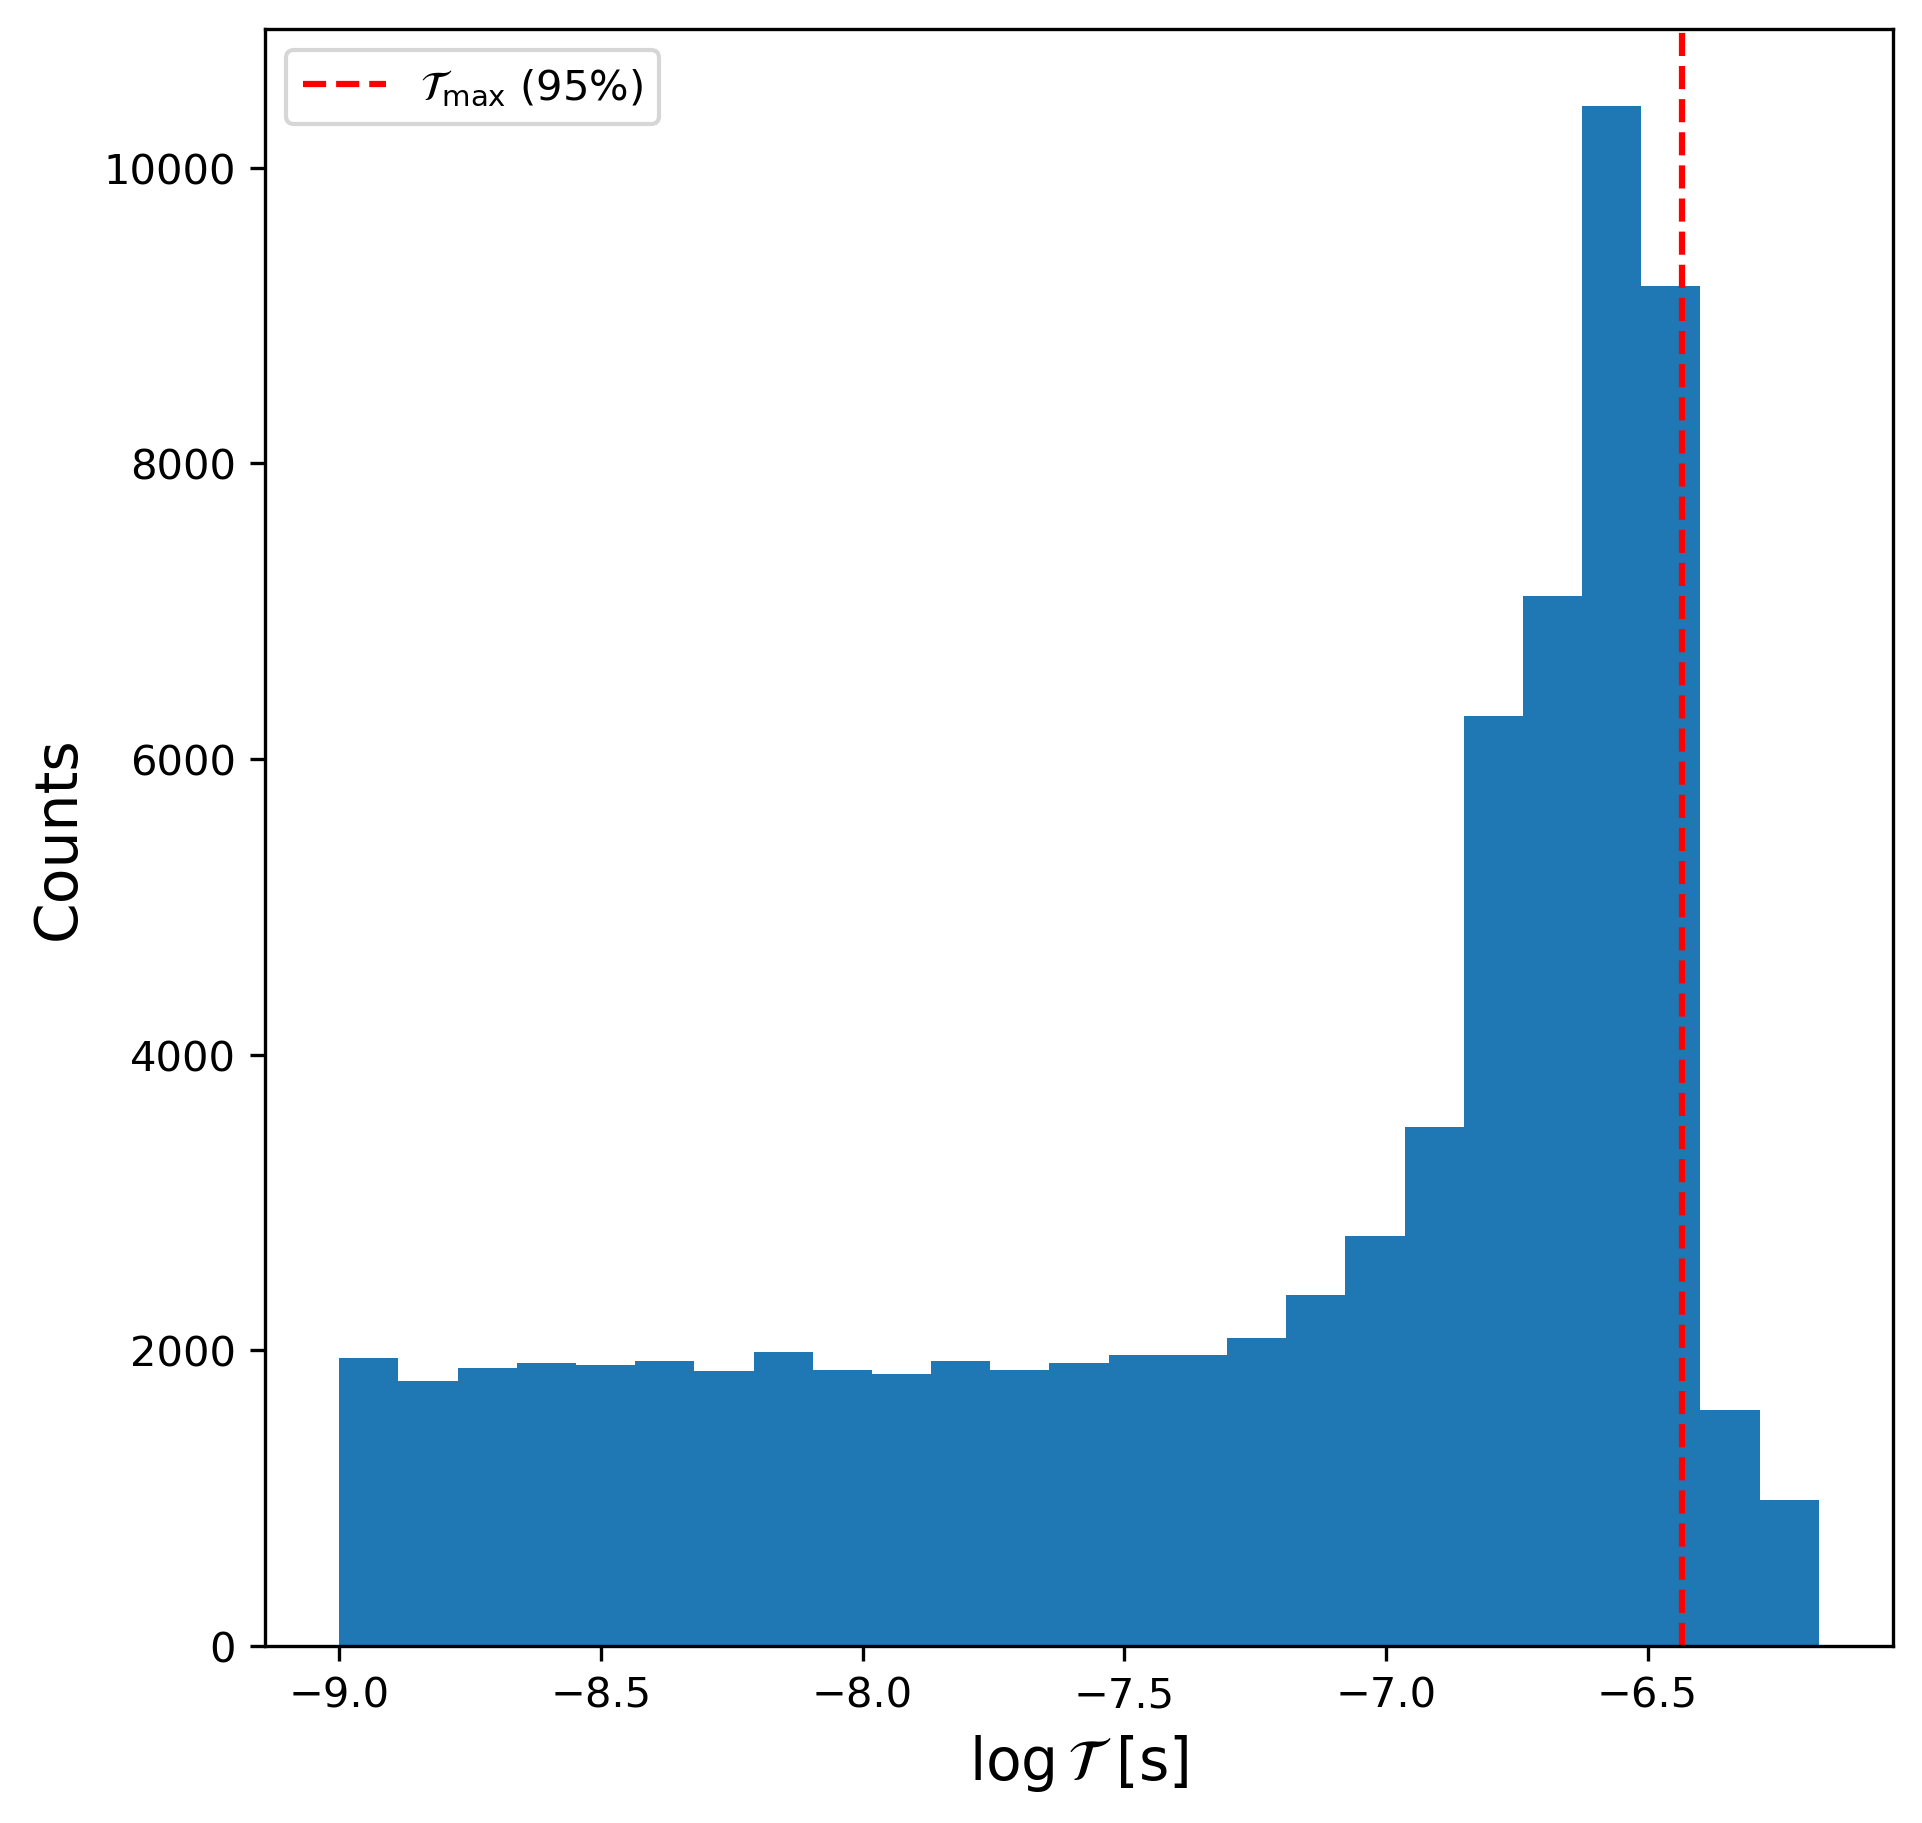

log_T_max=-6.435088508550085
T_max=3.6720745655470875e-07
m_T=1.8921102847484429e-06


In [32]:
psrlist = ['J2234+0944']
psrlist_formatted = ['J2234+0944']
all_chains = {}
psr = None
chain_folder = "/lorule/scratch/jdt00012/chains_12Nov_2024"
if psr is None:
    for k, psr in enumerate(psrlist):
        chain_file = f"{chain_folder}/{psr}/chain_1.txt"
        chain = np.genfromtxt(chain_file)
        print(f"PSR {psr}")
        print(f"Chain shape = {chain.shape}")
       
        ndim = len(params)
        burn = chain.shape[0]//4
        fig, axs = plt.subplots(ndim, 1)
        for i, param in enumerate(params):
            ax = axs[i]
            i+= 2
            ax.plot(chain[burn:, i], ls='-', marker=None, alpha=1.0)
            ax.set_ylabel(param)
        fig.tight_layout()
        plt.show()

        plt.plot(chain[burn:, -3])
        plt.ylabel('log_likelihood')
        plt.show()

        fig = corner.corner(chain[burn:,2:-4], labels=params,  plot_contours=True)
        fig.suptitle(psrlist_formatted[k], fontsize = 16)
        plt.show()
log_T_chain = chain[burn:, 2]
phi_plus_chain = chain[burn:, 5]
nbins = 25

log_T_copy = deepcopy(log_T_chain)
log_T_copy.sort()
L = len(log_T_copy)
log_T_max = log_T_copy[int(L*0.95)]
print(f"{log_T_max=}")
T_max = 10**log_T_max
print(f"{T_max=}")

fig, ax = plt.subplots(1,1, figsize = (7, 7), dpi = 300)
ax.hist(log_T_chain, bins = nbins)
ax.set_xlabel(r'$\log{\mathcal{T}}$ [s]')
ax.set_ylabel("Counts")
ax.axvline(x=log_T_max, color='red', linestyle='--', linewidth=1.5, label = "$\mathcal{T}_{\mathrm{max}}$ (95%)")
ax.legend()
plt.show()

log_T_copy = deepcopy(log_T_chain)
log_T_copy.sort()
L = len(log_T_copy)
log_T_max = log_T_copy[int(L*0.95)]
print(f"{log_T_max=}")
T_max = 10**log_T_max
print(f"{T_max=}")
m_c = 0.015385
x = 0.06842978404133411
z = 5*np.pi/180
m_T = 2 * m_c * T_max / (x * z)
print(f"{m_T=}")